<a href="https://colab.research.google.com/github/Fayn007/Jass-Bot/blob/main/Jass_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)







2.5.1+cu121


In [ ]:
#Turns Json file data to Tensors used for the trump network and trump accuracy testing
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

#circa 287466 games
def data_to_tensor_trump():
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  data = pd.read_csv('/content/FinalLogsCombined.txt', header = None, sep = 'delimiter')
  number_of_samples = 1000000
  x_samples = torch.zeros(number_of_samples, 37).to(device)
  y_samples = torch.zeros(number_of_samples, 6).to(device)
  one_sample_y = torch.zeros(1, 6).to(device)
  one_sample_gschobe = torch.zeros(1, 7).to(device)
  one_sample_gschobe[0][6] = 1
  y = 0
  sample_counter = 0
  game = 0
  tss_counter = 0
  while sample_counter < number_of_samples:
    try:
      test = data[0][game][43:]
      final_test = json.loads(test)
      data_normalized = pd.json_normalize(final_test['rounds'])
      game += 1
      for j in range (len(data_normalized['tricks'])):
        z = 1
        hand_0 = []
        hand_1 = []
        hand_2 = []
        hand_3 = []
        hands = [hand_0, hand_1, hand_2, hand_3]
        one_sample_x_0 = torch.zeros(1, 37).to(device)
        one_sample_x_1 = torch.zeros(1, 37).to(device)
        one_sample_x_2 = torch.zeros(1, 37).to(device)
        one_sample_x_3 = torch.zeros(1, 37).to(device)
        singualar_samples_x = [one_sample_x_0, one_sample_x_1, one_sample_x_2, one_sample_x_3]
        for i in range (len(data_normalized['tricks'][j])):
          x = data_normalized['tricks'][j][i]['first']
          hand_0.append(data_normalized['tricks'][j][i]['cards'][x])
          hand_1.append(data_normalized['tricks'][j][i]['cards'][(x + 1) % 4])
          hand_2.append(data_normalized['tricks'][j][i]['cards'][(x + 2) % 4])
          hand_3.append(data_normalized['tricks'][j][i]['cards'][(x + 3) % 4])
        for i in range (len(data_normalized['player'][j][x]['hand'])):
          hand_0.append(data_normalized['player'][j][x]['hand'][i])
          hand_1.append(data_normalized['player'][j][(x + 1) % 4]['hand'][i])
          hand_2.append(data_normalized['player'][j][(x + 2) % 4]['hand'][i])
          hand_3.append(data_normalized['player'][j][(x + 3) % 4]['hand'][i])
        tss = data_normalized['tss'][j]
        trump = data_normalized['trump'][j]
        for i in range (4):
          one_sample_y[0][5 - trump] = 1
          for v in range (len(hands[i])):
            card_value = 0
            if hands[i][v].__contains__('D'):
              card_value = card_value + 0
            if hands[i][v].__contains__('H'):
              card_value = card_value + 9
            if hands[i][v].__contains__('S'):
              card_value = card_value + 18
            if hands[i][v].__contains__('C'):
              card_value = card_value + 27
            if hands[i][v].__contains__('6'):
              card_value = card_value + 0
            if hands[i][v].__contains__('7'):
              card_value = card_value + 1
            if hands[i][v].__contains__('8'):
              card_value = card_value + 2
            if hands[i][v].__contains__('9'):
              card_value = card_value + 3
            if hands[i][v].__contains__('10'):
              card_value = card_value + 4
            if hands[i][v].__contains__('J'):
              card_value = card_value + 5
            if hands[i][v].__contains__('Q'):
              card_value = card_value + 6
            if hands[i][v].__contains__('K'):
              card_value = card_value + 7
            if hands[i][v].__contains__('A'):
              card_value = card_value + 8
            singualar_samples_x[i][0][card_value] = 1
        if sample_counter < number_of_samples:
          if np.isnan(tss):
            x_samples[sample_counter] = singualar_samples_x[0][0]
            #print(x_samples[sample_counter])
            y_samples[sample_counter] = one_sample_y
            #print(y_samples[sample_counter])
            sample_counter += 1
          else:
            singualar_samples_x[2][0][36] = 1
            x_samples[sample_counter] = singualar_samples_x[2][0]
            #print(x_samples[sample_counter])
            y_samples[sample_counter] = one_sample_y
            #print(y_samples[sample_counter])
            sample_counter += 1
            '''
            if sample_counter < number_of_samples:
              x_samples[sample_counter] = singualar_samples_x[0][0]
              #print(x_samples[sample_counter])
              y_samples[sample_counter] = one_sample_gschobe
              #print(y_samples[sample_counter])
              sample_counter += 1
              tss_counter += 1
            '''
          one_sample_y = torch.zeros(1, 6)
          if (sample_counter % 10000 == 1) or (sample_counter % 10000 == 2):
            print(sample_counter)
            print(x_samples[sample_counter - 1])
            print(y_samples[sample_counter - 1])
            print(tss_counter)
        else:
          print("done")
          print(x_samples[number_of_samples - 1])
          print(y_samples[number_of_samples - 1])
          torch.save(x_samples, 'x_samples_trump_2_normal.pt')
          torch.save(y_samples, 'y_samples_trump_2_normal.pt')
          return
    except:

        pass
data_to_tensor_trump()
# and tss_counter < number_of_samples // 14

<ipython-input-12-679dc44a0836>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/content/FinalLogsCombined.txt', header = None, sep = 'delimiter')


1
tensor([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        1.])
tensor([0., 0., 0., 0., 0., 1.])
0
2
tensor([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        1.])
tensor([1., 0., 0., 0., 0., 0.])
0
10001
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        1.])
tensor([0., 1., 0., 0., 0., 0.])
0
10002
tensor([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1.])
tensor([0., 0., 0., 0., 0., 1.])
0
20001
tensor([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
#Turns Json file data to Tensors for playing network and accuracy testing
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

#circa 287466 games
def data_to_tensor():
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  data = pd.read_csv('/content/FinalLogsCombined.txt', header = None, sep = 'delimiter')
  number_of_samples = 5000000
  x_samples = torch.zeros(number_of_samples, 42).to(device)
  y_samples = torch.zeros(number_of_samples, 36).to(device)
  one_sample_y = torch.zeros(1, 36).to(device)
  y = 0
  sample_counter = 0
  game = 20000
  while sample_counter < number_of_samples:
    try:
      test = data[0][game][43:]
      final_test = json.loads(test)
      data_normalized = pd.json_normalize(final_test['rounds'])
      game += 1
      for j in range (len(data_normalized['tricks'])):
        z = 1
        hand_0 = []
        hand_1 = []
        hand_2 = []
        hand_3 = []
        hands = [hand_0, hand_1, hand_2, hand_3]
        one_sample_x_0 = torch.zeros(1, 42).to(device)
        one_sample_x_1 = torch.zeros(1, 42).to(device)
        one_sample_x_2 = torch.zeros(1, 42).to(device)
        one_sample_x_3 = torch.zeros(1, 42).to(device)
        singualar_samples_x = [one_sample_x_0, one_sample_x_1, one_sample_x_2, one_sample_x_3]
        for i in range (len(data_normalized['tricks'][j])):
          x = data_normalized['tricks'][j][i]['first']
          hand_0.append(data_normalized['tricks'][j][i]['cards'][x])
          hand_1.append(data_normalized['tricks'][j][i]['cards'][(x + 1) % 4])
          hand_2.append(data_normalized['tricks'][j][i]['cards'][(x + 2) % 4])
          hand_3.append(data_normalized['tricks'][j][i]['cards'][(x + 3) % 4])
        for i in range (len(data_normalized['player'][j][x]['hand'])):
          hand_0.append(data_normalized['player'][j][x]['hand'][i])
          hand_1.append(data_normalized['player'][j][(x + 1) % 4]['hand'][i])
          hand_2.append(data_normalized['player'][j][(x + 2) % 4]['hand'][i])
          hand_3.append(data_normalized['player'][j][(x + 3) % 4]['hand'][i])
        trump = data_normalized['trump'][j]
        for k in range (9 - len(data_normalized['player'][j][x]['hand'])):
          for i in range (4):
            singualar_samples_x[i][0][41 - trump] = 1
            for v in range (len(hands[i])):
              card_value = 0
              if hands[i][v].__contains__('D'):
                card_value = card_value + 0
              if hands[i][v].__contains__('H'):
                card_value = card_value + 9
              if hands[i][v].__contains__('S'):
                card_value = card_value + 18
              if hands[i][v].__contains__('C'):
                card_value = card_value + 27
              if hands[i][v].__contains__('6'):
                card_value = card_value + 0
              if hands[i][v].__contains__('7'):
                card_value = card_value + 1
              if hands[i][v].__contains__('8'):
                card_value = card_value + 2
              if hands[i][v].__contains__('9'):
                card_value = card_value + 3
              if hands[i][v].__contains__('10'):
                card_value = card_value + 4
              if hands[i][v].__contains__('J'):
                card_value = card_value + 5
              if hands[i][v].__contains__('Q'):
                card_value = card_value + 6
              if hands[i][v].__contains__('K'):
                card_value = card_value + 7
              if hands[i][v].__contains__('A'):
                card_value = card_value + 8
              singualar_samples_x[i][0][card_value] = -1
              if v == 0:
                card_value_y = card_value
            if sample_counter < number_of_samples:
              one_sample_y[0][card_value_y] = 1
              y_samples[sample_counter] = one_sample_y
              x_samples[sample_counter] = singualar_samples_x[i]
              one_sample_y = torch.zeros(1, 36)
              hands[i].pop(0)
              singualar_samples_x[0][0][card_value_y] = z
              singualar_samples_x[1][0][card_value_y] = z
              singualar_samples_x[2][0][card_value_y] = z
              singualar_samples_x[3][0][card_value_y] = z
              z = z + 1
              if (sample_counter % 100000 == 0):
                print(sample_counter)
                print(x_samples[i])
                print(y_samples[i])
              sample_counter += 1
            else:
              print("done")
              print(x_samples[number_of_samples - 1])
              print(y_samples[number_of_samples - 1])
              torch.save(x_samples, 'x_samples_4.pt')
              torch.save(y_samples, 'y_samples_4.pt')
              return
    except:

        pass
data_to_tensor()

<ipython-input-2-649a475f92d6>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/content/FinalLogsCombined.txt', header = None, sep = 'delimiter')


0
tensor([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0.,  0., -1.,  0., -1.,
        -1., -1.,  0.,  0.,  0.,  0., -1., -1.,  1.,  0.,  0.,  0.,  0.,  0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
100000
tensor([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0.,  0., -1.,  0., -1.,
        -1., -1.,  0.,  0.,  0.,  0., -1., -1.,  1.,  0.,  0.,  0.,  0.,  0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
200000
tensor([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0.,  0., -1.,  0., -1.,
        -1., -1.,  0.,  0.,  0.,  0.

<ipython-input-14-b76fa08343a5>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_samples = torch.load('x_samples_trump_2_normal.pt', map_location=torch.device('cpu'))
<ip

1000000 1000000
0
[1.741652011871338]
[0.21691499650478363]
[0.21629750728607178]
[1.7466076612472534]
tensor([[ 0.5587,  0.3856,  0.2697,  0.2891, -0.7707, -0.8310],
        [ 0.0239, -0.2134,  0.0589,  0.1175,  0.0169,  0.0050],
        [ 0.6465,  0.4596,  0.2294,  0.3230, -0.8282, -0.8665],
        [-0.0237, -0.1693,  0.0925,  0.0564,  0.0120,  0.0084],
        [ 0.0520, -0.1802,  0.1106,  0.0840,  0.0532,  0.0693]])
tensor(1)


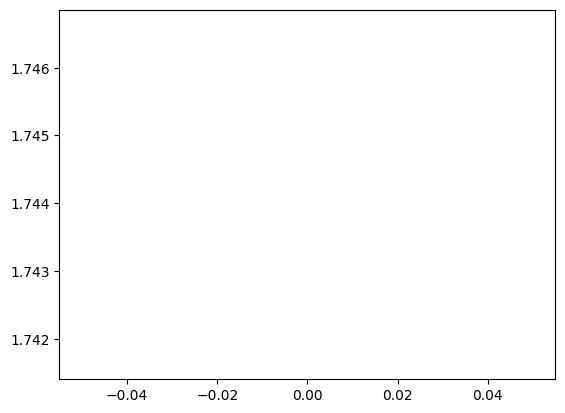

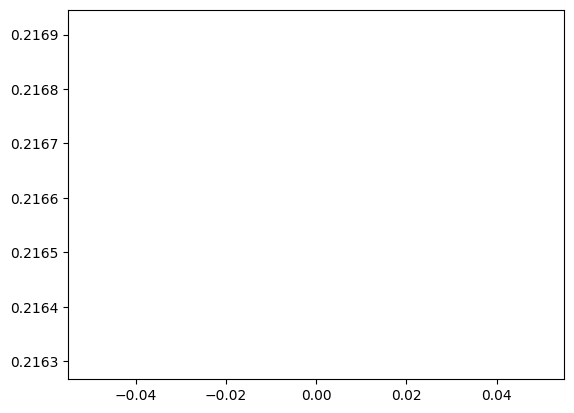

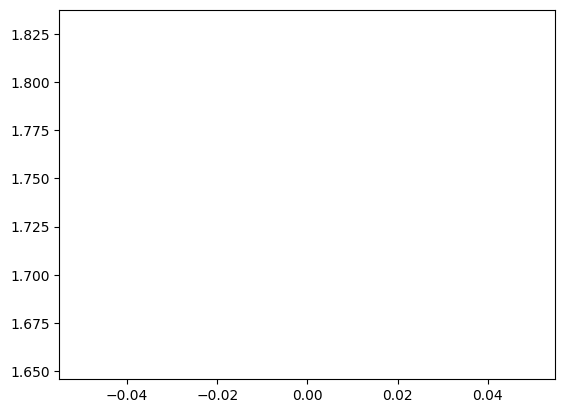

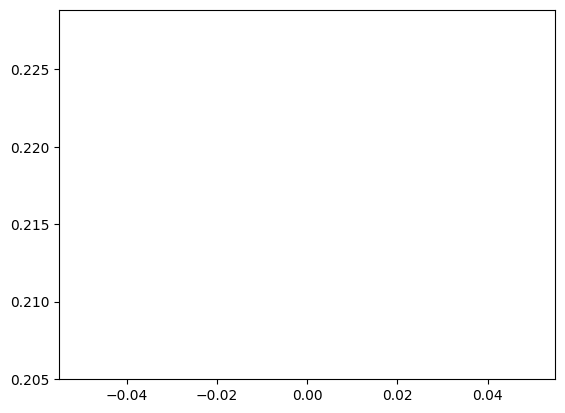

1
[1.741652011871338, 1.7416216135025024]
[0.21691499650478363, 0.21784499287605286]
[0.21629750728607178, 0.21913374960422516]
[1.7466076612472534, 1.7416915893554688]
tensor([[ 0.5624,  0.3904,  0.2674,  0.2678, -0.7756, -0.8238],
        [ 0.0230, -0.2101,  0.0653,  0.1029,  0.0251, -0.0029],
        [ 0.6577,  0.4483,  0.2441,  0.3094, -0.8162, -0.8744],
        [-0.0122, -0.1768,  0.0889,  0.0444,  0.0106,  0.0127],
        [ 0.0456, -0.1767,  0.1145,  0.0831,  0.0482,  0.0695]])
tensor(1)


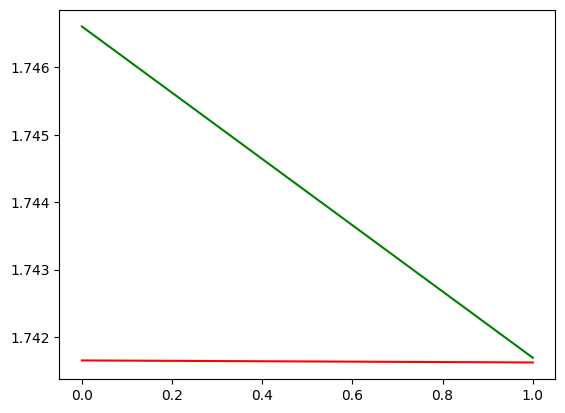

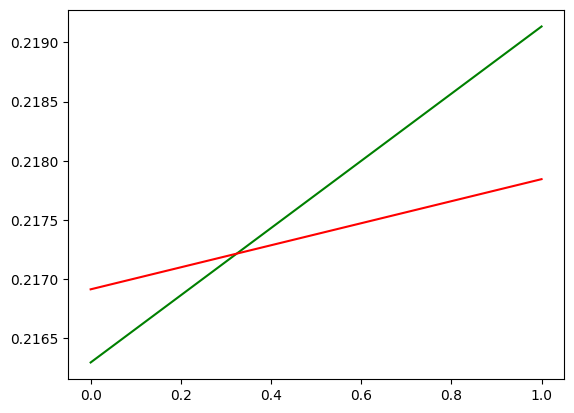

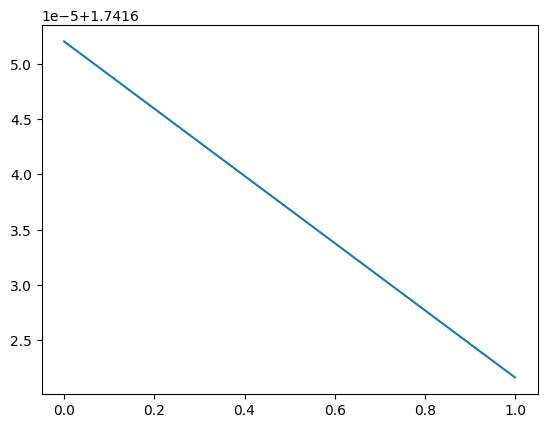

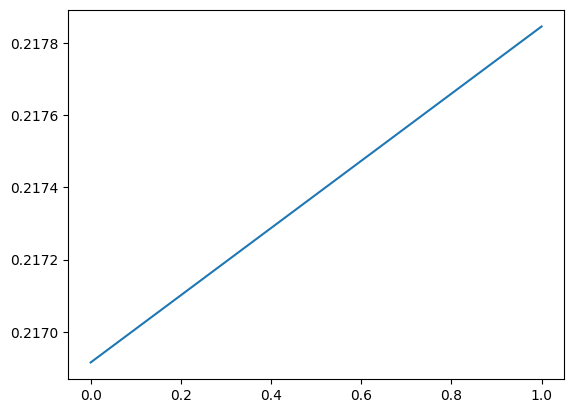

2
[1.741652011871338, 1.7416216135025024, 1.7416176795959473]
[0.21691499650478363, 0.21784499287605286, 0.21819999814033508]
[0.21629750728607178, 0.21913374960422516, 0.21983499825000763]
[1.7466076612472534, 1.7416915893554688, 1.741658329963684]
tensor([[ 0.5630,  0.3928,  0.2674,  0.2576, -0.7799, -0.8198],
        [ 0.0232, -0.2090,  0.0663,  0.0956,  0.0264, -0.0045],
        [ 0.6609,  0.4450,  0.2479,  0.3051, -0.8111, -0.8782],
        [-0.0083, -0.1798,  0.0890,  0.0383,  0.0089,  0.0146],
        [ 0.0444, -0.1766,  0.1150,  0.0800,  0.0461,  0.0695]])
tensor(1)


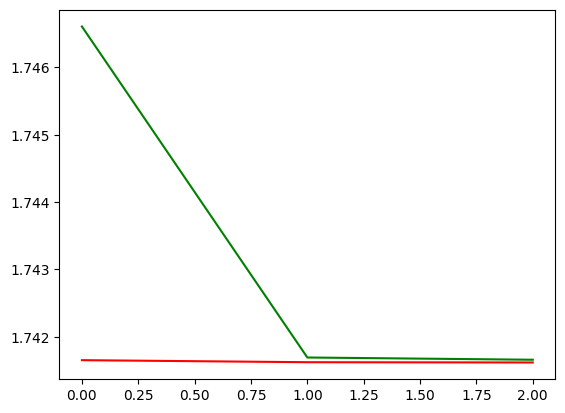

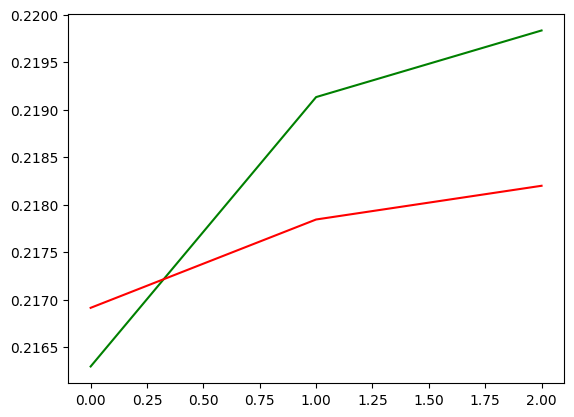

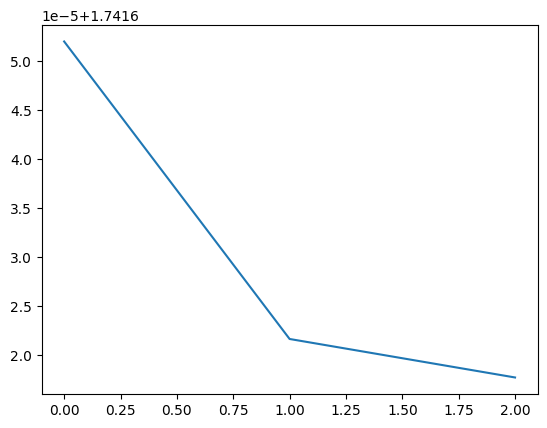

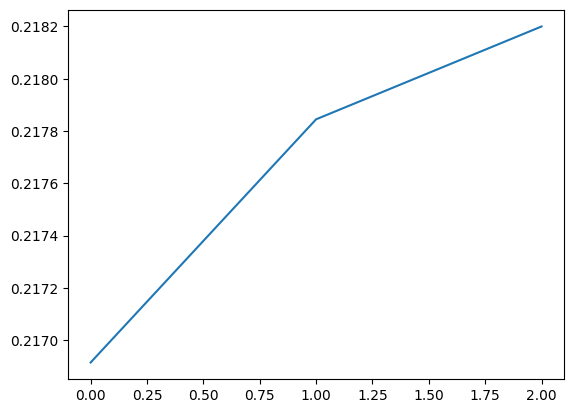

3
[1.741652011871338, 1.7416216135025024, 1.7416176795959473, 1.741613745689392]
[0.21691499650478363, 0.21784499287605286, 0.21819999814033508, 0.21871499717235565]
[0.21629750728607178, 0.21913374960422516, 0.21983499825000763, 0.22018499672412872]
[1.7466076612472534, 1.7416915893554688, 1.741658329963684, 1.7416439056396484]
tensor([[ 0.5632,  0.3941,  0.2672,  0.2522, -0.7833, -0.8174],
        [ 0.0232, -0.2085,  0.0662,  0.0914,  0.0260, -0.0045],
        [ 0.6625,  0.4437,  0.2489,  0.3030, -0.8088, -0.8796],
        [-0.0069, -0.1809,  0.0884,  0.0350,  0.0077,  0.0157],
        [ 0.0443, -0.1770,  0.1143,  0.0776,  0.0448,  0.0691]])
tensor(1)


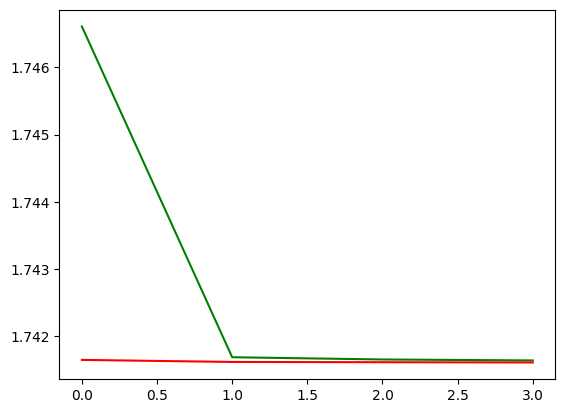

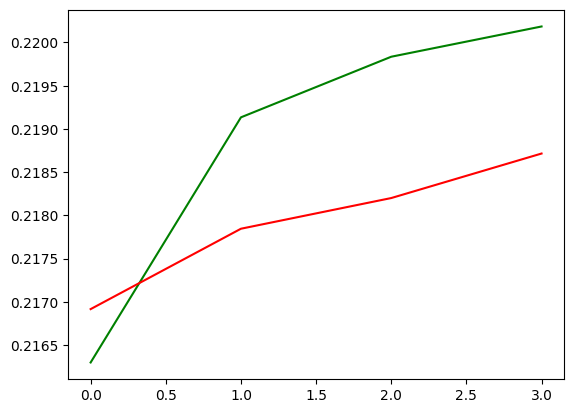

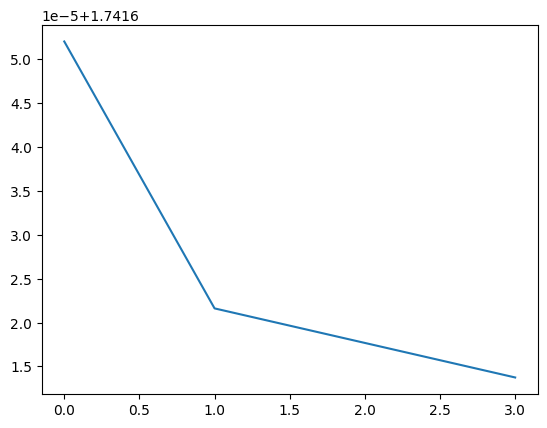

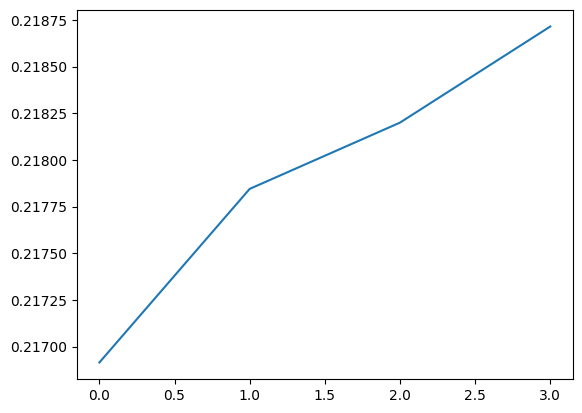

4
[1.741652011871338, 1.7416216135025024, 1.7416176795959473, 1.741613745689392, 1.741608738899231]
[0.21691499650478363, 0.21784499287605286, 0.21819999814033508, 0.21871499717235565, 0.21893499791622162]
[0.21629750728607178, 0.21913374960422516, 0.21983499825000763, 0.22018499672412872, 0.22023500502109528]
[1.7466076612472534, 1.7416915893554688, 1.741658329963684, 1.7416439056396484, 1.741634726524353]
tensor([[ 0.5634,  0.3947,  0.2666,  0.2491, -0.7859, -0.8159],
        [ 0.0233, -0.2082,  0.0658,  0.0888,  0.0252, -0.0043],
        [ 0.6635,  0.4431,  0.2491,  0.3017, -0.8078, -0.8799],
        [-0.0061, -0.1814,  0.0874,  0.0332,  0.0067,  0.0163],
        [ 0.0444, -0.1775,  0.1132,  0.0757,  0.0437,  0.0684]])
tensor(1)


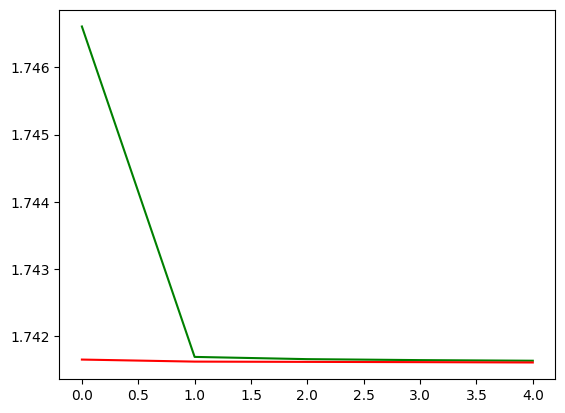

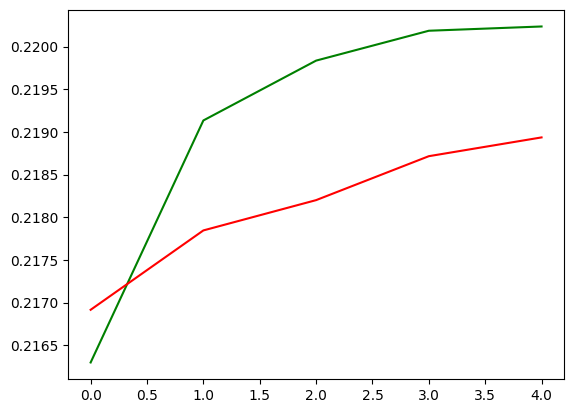

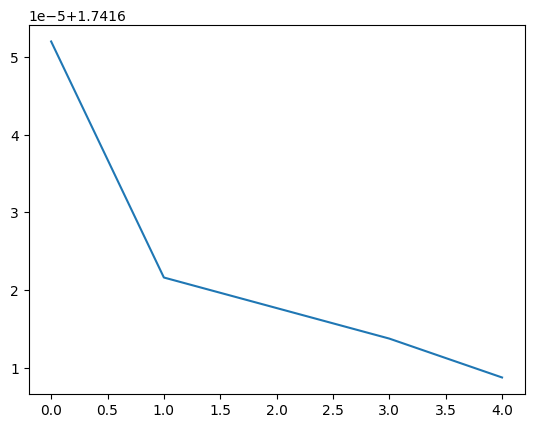

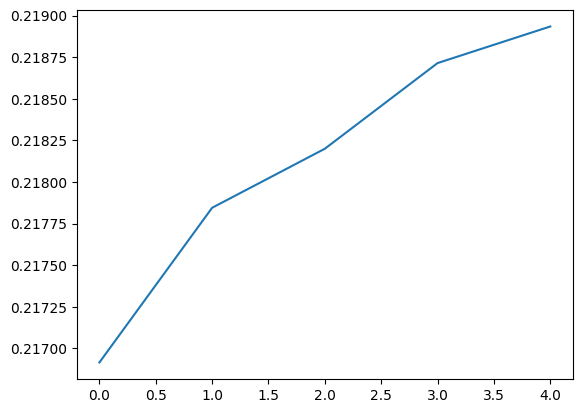

5
[1.7416216135025024, 1.7416176795959473, 1.741613745689392, 1.741608738899231, 1.741603136062622]
[0.21784499287605286, 0.21819999814033508, 0.21871499717235565, 0.21893499791622162, 0.2192399948835373]
[0.21913374960422516, 0.21983499825000763, 0.22018499672412872, 0.22023500502109528, 0.2203724980354309]
[1.7416915893554688, 1.741658329963684, 1.7416439056396484, 1.741634726524353, 1.7416266202926636]
tensor([[ 0.5638,  0.3951,  0.2659,  0.2472, -0.7879, -0.8149],
        [ 0.0233, -0.2079,  0.0652,  0.0870,  0.0244, -0.0040],
        [ 0.6644,  0.4428,  0.2492,  0.3010, -0.8073, -0.8797],
        [-0.0055, -0.1817,  0.0862,  0.0320,  0.0059,  0.0169],
        [ 0.0445, -0.1778,  0.1120,  0.0742,  0.0429,  0.0677]])
tensor(1)


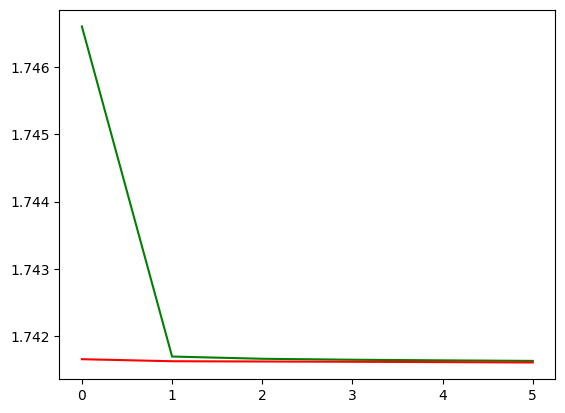

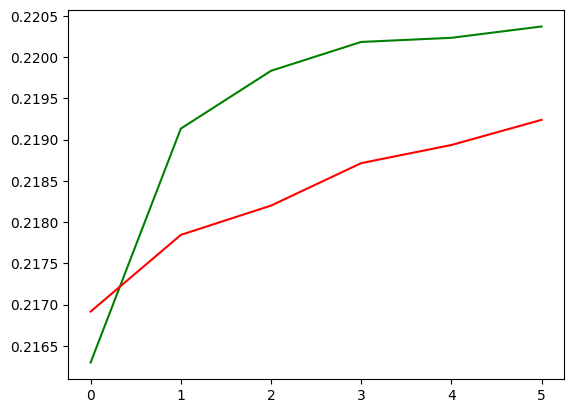

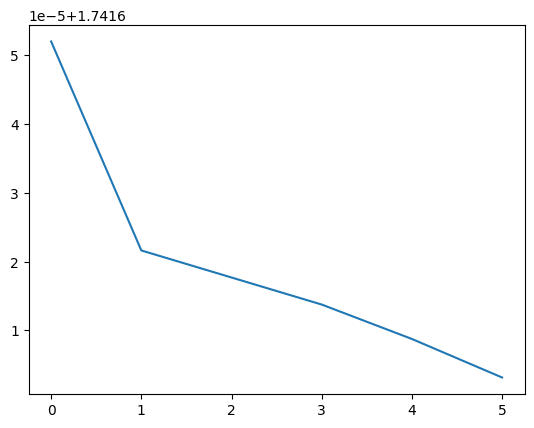

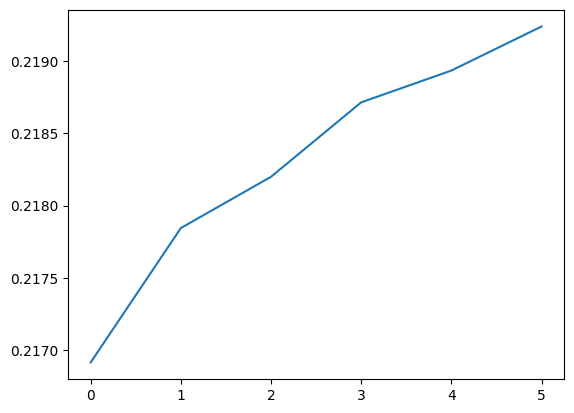

6
[1.7416176795959473, 1.741613745689392, 1.741608738899231, 1.741603136062622, 1.7415971755981445]
[0.21819999814033508, 0.21871499717235565, 0.21893499791622162, 0.2192399948835373, 0.2195349931716919]
[0.21983499825000763, 0.22018499672412872, 0.22023500502109528, 0.2203724980354309, 0.22043250501155853]
[1.741658329963684, 1.7416439056396484, 1.741634726524353, 1.7416266202926636, 1.7416220903396606]
tensor([[ 0.5642,  0.3954,  0.2651,  0.2459, -0.7895, -0.8144],
        [ 0.0234, -0.2076,  0.0647,  0.0858,  0.0237, -0.0037],
        [ 0.6652,  0.4427,  0.2492,  0.3004, -0.8071, -0.8791],
        [-0.0048, -0.1819,  0.0851,  0.0313,  0.0053,  0.0173],
        [ 0.0446, -0.1782,  0.1108,  0.0728,  0.0421,  0.0670]])
tensor(1)


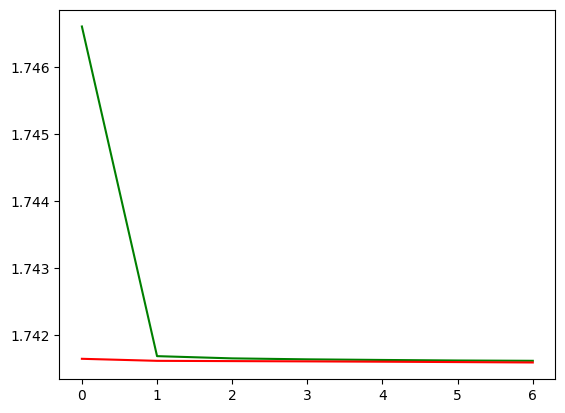

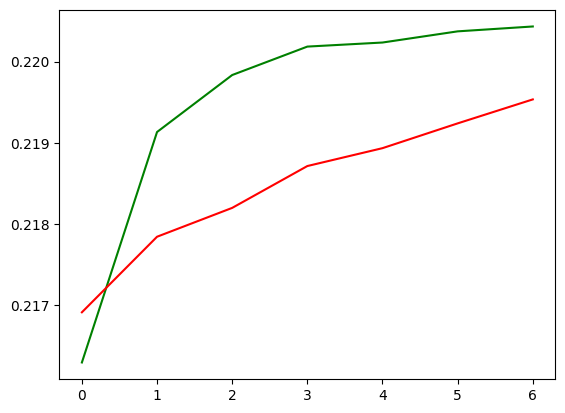

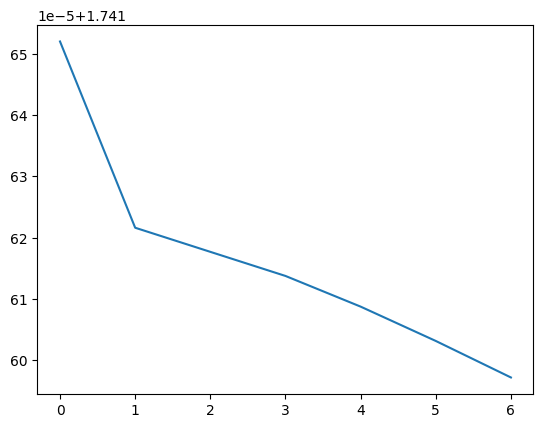

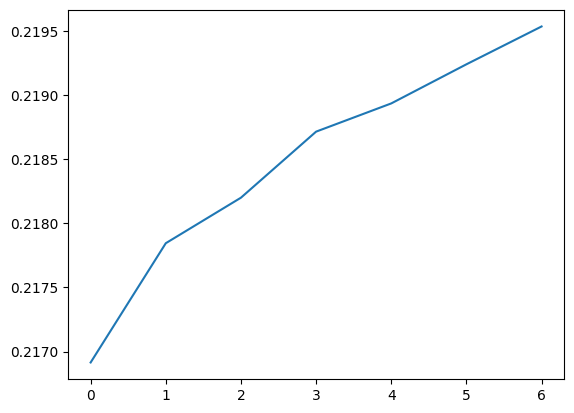

7
[1.741613745689392, 1.741608738899231, 1.741603136062622, 1.7415971755981445, 1.7415916919708252]
[0.21871499717235565, 0.21893499791622162, 0.2192399948835373, 0.2195349931716919, 0.21961499750614166]
[0.22018499672412872, 0.22023500502109528, 0.2203724980354309, 0.22043250501155853, 0.2204737514257431]
[1.7416439056396484, 1.741634726524353, 1.7416266202926636, 1.7416220903396606, 1.741615891456604]
tensor([[ 0.5647,  0.3956,  0.2644,  0.2450, -0.7909, -0.8140],
        [ 0.0235, -0.2074,  0.0642,  0.0849,  0.0231, -0.0035],
        [ 0.6660,  0.4427,  0.2492,  0.3000, -0.8069, -0.8784],
        [-0.0042, -0.1821,  0.0840,  0.0308,  0.0049,  0.0178],
        [ 0.0448, -0.1784,  0.1096,  0.0717,  0.0413,  0.0662]])
tensor(1)


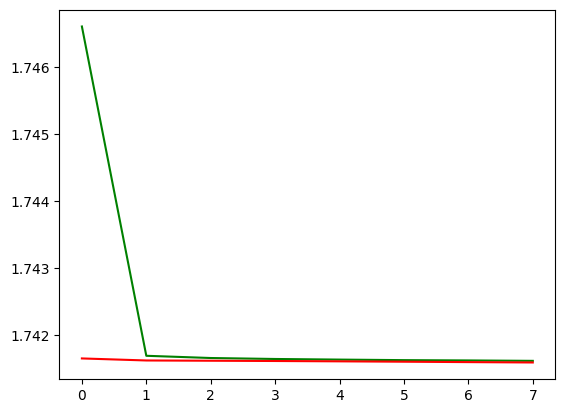

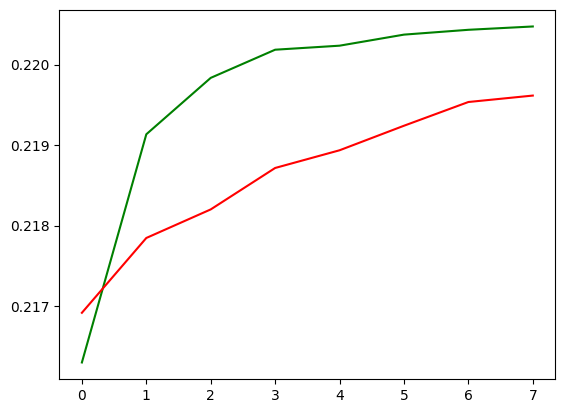

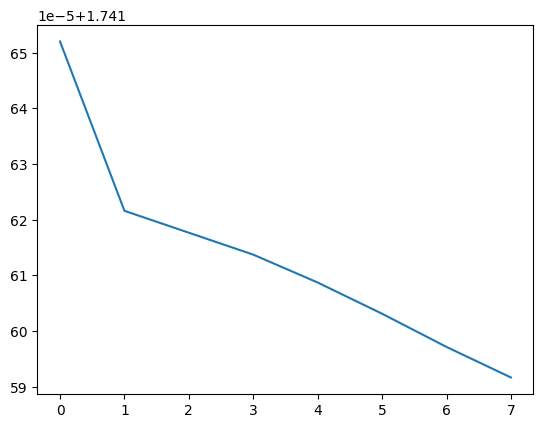

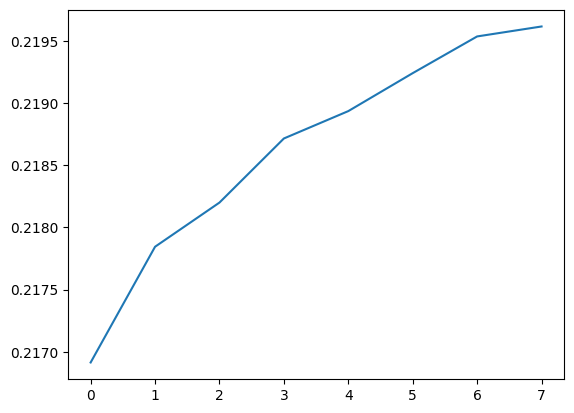

8
[1.741608738899231, 1.741603136062622, 1.7415971755981445, 1.7415916919708252, 1.741586446762085]
[0.21893499791622162, 0.2192399948835373, 0.2195349931716919, 0.21961499750614166, 0.21975499391555786]
[0.22023500502109528, 0.2203724980354309, 0.22043250501155853, 0.2204737514257431, 0.22051499783992767]
[1.741634726524353, 1.7416266202926636, 1.7416220903396606, 1.741615891456604, 1.7416090965270996]
tensor([[ 0.5652,  0.3958,  0.2637,  0.2444, -0.7920, -0.8138],
        [ 0.0237, -0.2071,  0.0638,  0.0842,  0.0227, -0.0034],
        [ 0.6669,  0.4429,  0.2493,  0.2998, -0.8068, -0.8775],
        [-0.0035, -0.1822,  0.0830,  0.0306,  0.0046,  0.0183],
        [ 0.0449, -0.1786,  0.1085,  0.0706,  0.0406,  0.0654]])
tensor(1)


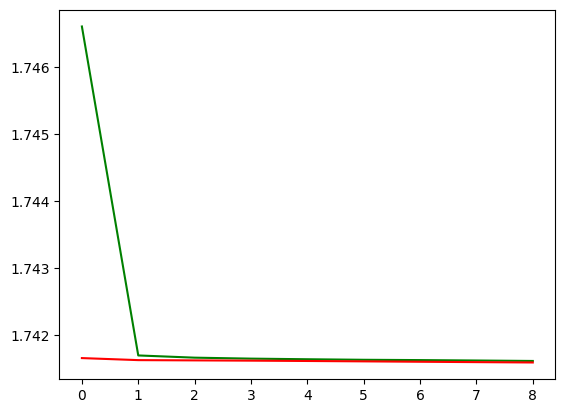

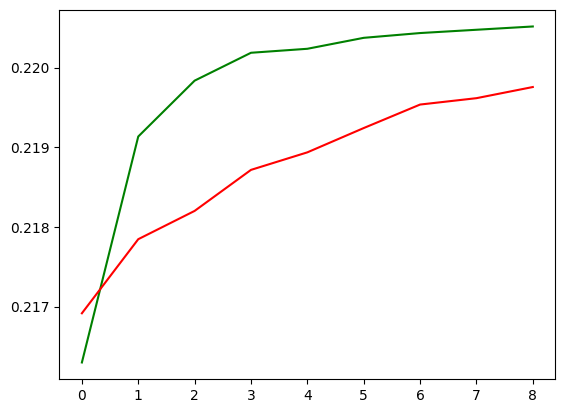

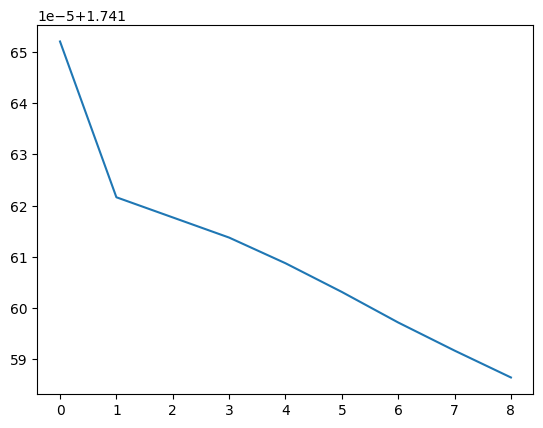

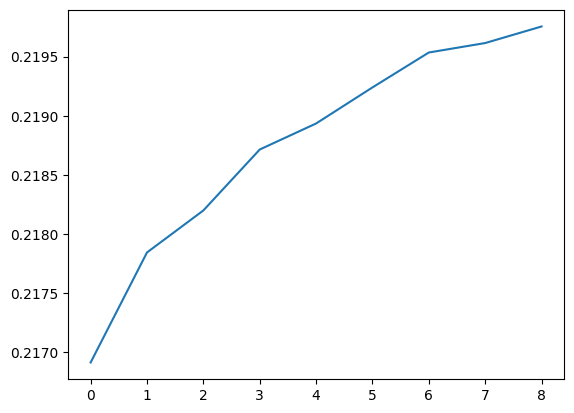

9
[1.741603136062622, 1.7415971755981445, 1.7415916919708252, 1.741586446762085, 1.7415812015533447]
[0.2192399948835373, 0.2195349931716919, 0.21961499750614166, 0.21975499391555786, 0.21995000541210175]
[0.2203724980354309, 0.22043250501155853, 0.2204737514257431, 0.22051499783992767, 0.22057375311851501]
[1.7416266202926636, 1.7416220903396606, 1.741615891456604, 1.7416090965270996, 1.7416011095046997]
tensor([[ 0.5657,  0.3960,  0.2630,  0.2440, -0.7929, -0.8137],
        [ 0.0240, -0.2068,  0.0635,  0.0836,  0.0224, -0.0032],
        [ 0.6678,  0.4432,  0.2494,  0.2997, -0.8066, -0.8766],
        [-0.0028, -0.1823,  0.0821,  0.0306,  0.0044,  0.0187],
        [ 0.0450, -0.1787,  0.1075,  0.0697,  0.0399,  0.0647]])
tensor(1)


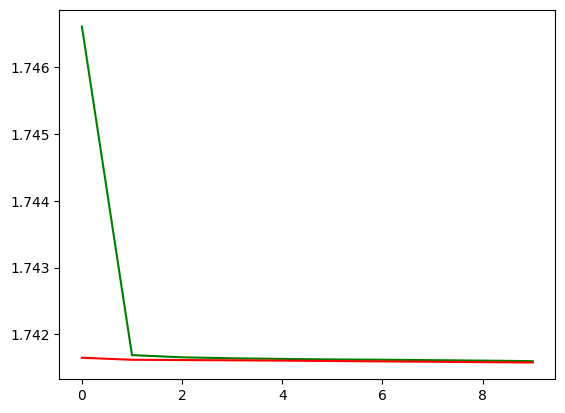

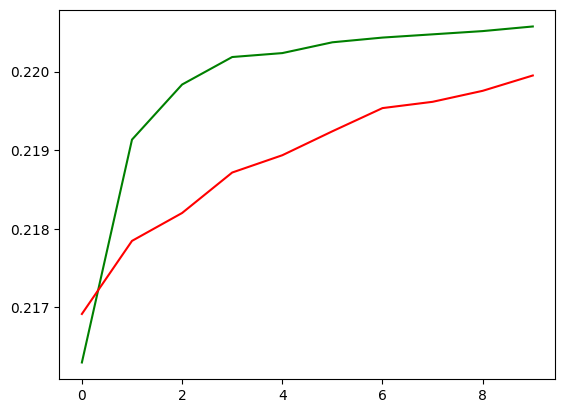

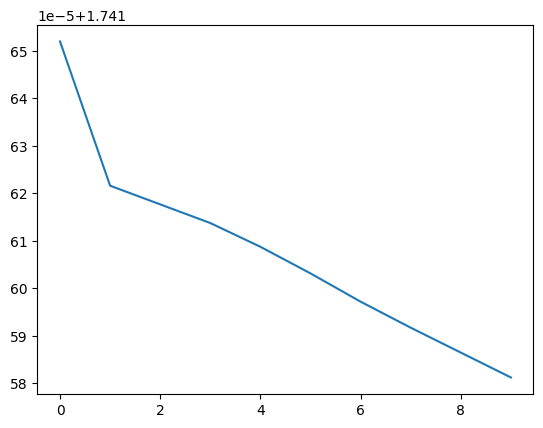

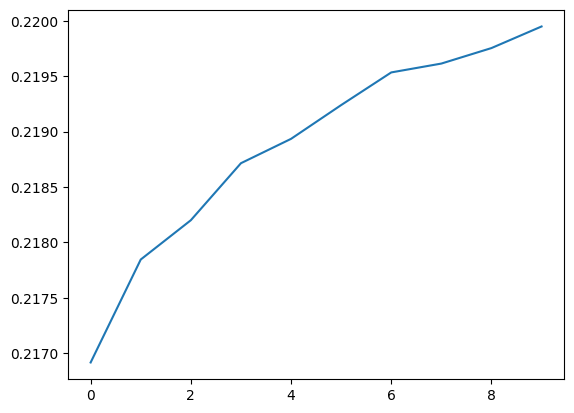

<Figure size 640x480 with 0 Axes>

In [ ]:
#Neural Network for choosing trump
import torch
import sklearn
from torch import nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_samples = torch.load('x_samples_trump_2_normal.pt', map_location=torch.device('cpu'))
y_samples = torch.load('y_samples_trump_2_normal.pt', map_location=torch.device('cpu'))
print(len(x_samples), len(y_samples))
batch_size = 128
torch.manual_seed(3)
torch.cuda.manual_seed(3)
epochs = 10
acc = 0
train_acc = []
test_acc = []
train_loss = []
test_loss = []
m = nn.Softmax()

from timeit import default_timer as timer
train_time_start_model_0 = timer()

x_train, x_test, y_train, y_test = train_test_split(x_samples,
                                                    y_samples,
                                                    test_size=0.2)

batches_per_epoch = len(x_train) // batch_size

#test_dataloader = DataLoader(dataset=test)
class trump_bot_module_v0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=37, out_features=64)
    self.act_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=64, out_features=32)
    self.act_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=32, out_features=6)
    self.act_3 = nn.Sigmoid()



  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_0 = trump_bot_module_v0().to(device)

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.0005)

#def accuracy_fn(y_train, y_pred):
  #sum = sum + torch.sum(y_train - y_pred)

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  counter = 0
  train_loss_batch = [0] * batches_per_epoch
  train_acc_batch = [0] * batches_per_epoch
  for i in range(batches_per_epoch):
    start = i * batch_size

    x_batch = x_train[start:start+batch_size]
    y_batch = y_train[start:start+batch_size]

    model_0.train()

    y_pred = model_0(x_batch)
    #y_pred = nn.functional.softmax(y_pred)

    loss = loss_fn(y_pred,
                  y_batch)

    optimizer.zero_grad()
    loss.backward()

    train_loss_batch[counter] = loss



    optimizer.step()

    acc = torch.sum(torch.argmax(y_pred, dim=1) == torch.argmax(y_train[start:start+batch_size], dim=1))
    train_acc_batch[counter] = acc/len(y_pred)

    counter += 1
  train_loss.append(float(sum(train_loss_batch) / len(train_loss_batch)))
  train_acc.append(float(sum(train_acc_batch) / len(train_acc_batch)))
  model_0.eval()
  with torch.inference_mode():

    y_pred = model_0(x_test)
    #y_pred = nn.functional.softmax(y_pred)

    loss = loss_fn(y_pred,
                        y_test)
    test_loss.append(float(loss))

    acc = torch.sum(torch.argmax(y_pred, dim=1) == torch.argmax(y_test, dim=1))
    test_acc.append(float(acc/len(y_pred)))

    if epoch % 1 == 0:
      print(epoch)
      print(test_loss[-5:])
      print(test_acc[-5:])
      print(train_acc[-5:])
      print(train_loss[-5:])
      print(y_pred[-5:])
      print(torch.argmax(y_test[-1:]))
      plt.plot(train_loss, 'g',  test_loss, 'r')
      plt.savefig('loss_curve_jass_train.png')
      plt.show()
      plt.close
      plt.clf()
      plt.plot(train_acc, 'g', test_acc, 'r')
      plt.savefig('acc_curve_jass_train.png')
      plt.show()
      plt.close
      plt.clf()
      plt.plot(test_loss)
      plt.savefig('loss_curve_jass_test.png')
      plt.show()
      plt.close
      plt.clf()
      plt.plot(test_acc)
      plt.savefig('acc_curve_jass_test.png')
      plt.show()
      plt.close
      plt.clf()
      #if sum(test_loss[-5:]) + 0.005 >= sum(test_loss[-10:-5]) and epoch >=10:
        #break

torch.save(model_0.state_dict(), 'model_trump_2_state_dict_final.pt')

<ipython-input-22-91f3f4df80d0>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_samples = torch.load('/content/x_samples_final.pt')
<ipython-input-22-91f3f4df80d0>:10: Fu

0
[1.9953757524490356]
[0.3806622624397278]
[1.5059902667999268]
[0.4518530070781708]
tensor([[  7.5013,   7.8017,   7.9126, -17.6643,   7.4629,  10.0012,   9.9153,
           6.6543,   7.8095, -28.2927, -24.9626,   5.9805,   3.0556,   8.0916,
           8.1975, -13.8731,   0.4675,  -3.4668, -16.8587,   7.7097,   7.7988,
          -5.5645,   7.5659, -10.2726, -11.0604,   7.3820,  10.4350,   7.4605,
         -32.6069, -25.8554,  10.5617,  10.2626,   7.4495,   7.8546,   7.1869,
          10.6993],
        [  9.1165,   6.1276,   6.3374,   5.7520,   8.3520,   5.6751,   6.1312,
           5.5398,   6.1484, -26.6941, -23.3159,   6.9014, -15.2794,   6.6609,
           9.2686,   6.4211, -15.7471,   6.6685,   1.6276,  -7.2448,  -7.4716,
           5.2752,  -0.4844,   7.4531,   7.3985,  -2.7183, -13.6207,   8.9780,
         -28.2495,   6.2569,   8.4733,   8.4328,   5.7721,   5.9919,   5.5507,
           6.1898],
        [-30.4454, -30.5755, -21.8823, -18.6429,   6.5946, -31.1267,  -4.8999,
     

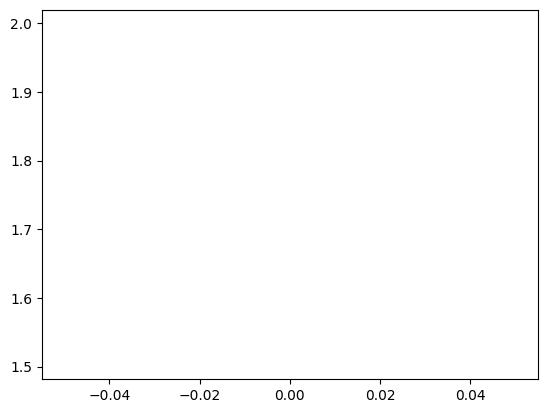

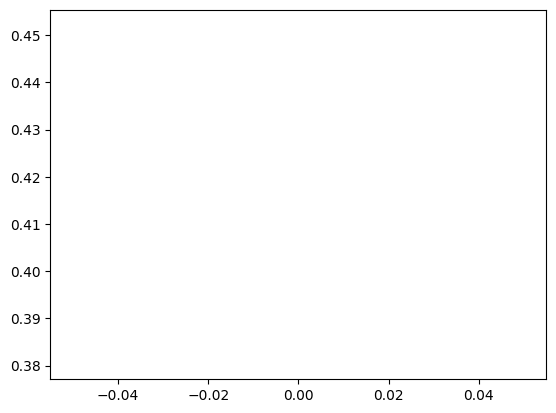

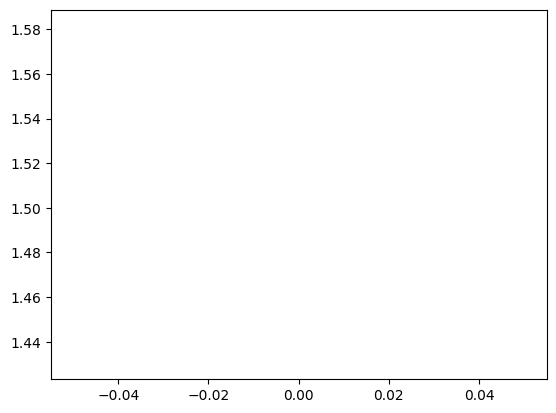

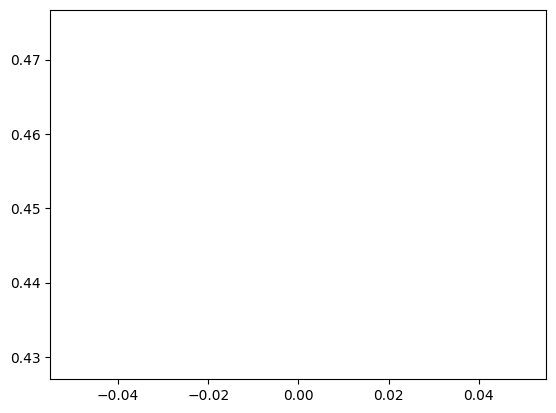

1
[1.9953757524490356, 1.423638105392456]
[0.3806622624397278, 0.45604848861694336]
[1.5059902667999268, 1.3831291198730469]
[0.4518530070781708, 0.4577929973602295]
tensor([[ 10.8911,  11.0834,  11.1062, -27.5690,  10.7087,  14.5560,  14.4377,
           9.7139,  11.2198, -38.8246, -34.3312,   8.1787,   3.9629,  11.5345,
          11.6377, -22.5473,  -0.1644,  -4.7586, -22.9437,  10.9595,  11.0011,
          -8.7980,  10.7921, -14.0229, -16.7502,  10.6815,  15.0494,  10.8679,
         -46.5026, -39.3812,  15.0949,  14.8983,  10.8398,  11.1654,  10.4037,
          15.3587],
        [ 12.9934,   8.7844,   8.9173,   8.2651,  12.2767,   8.2536,   8.7970,
           8.1495,   8.9475, -36.5372, -32.1914,   9.6753, -22.5821,   9.3884,
          13.3555,   9.0522, -24.8002,   9.4897,   2.1994, -10.3415, -12.3930,
           6.8515,  -1.4692,  10.3591,  10.2511,  -5.1389, -18.9064,  12.8838,
         -40.2641,   8.9014,  12.4243,  12.3729,   8.4433,   8.5990,   8.1806,
           8.8409],
    

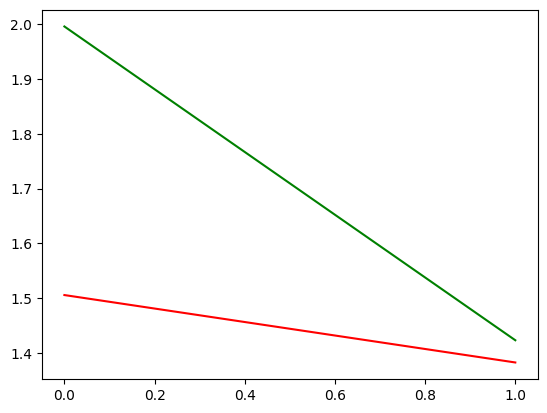

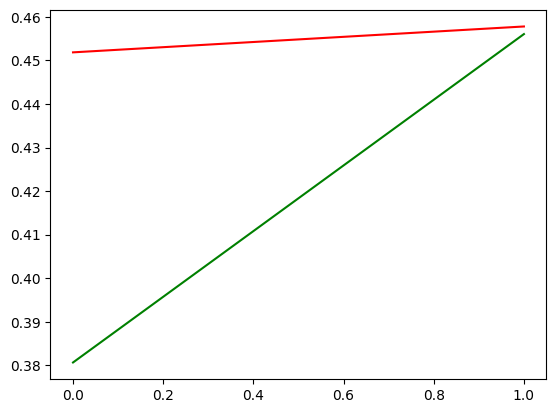

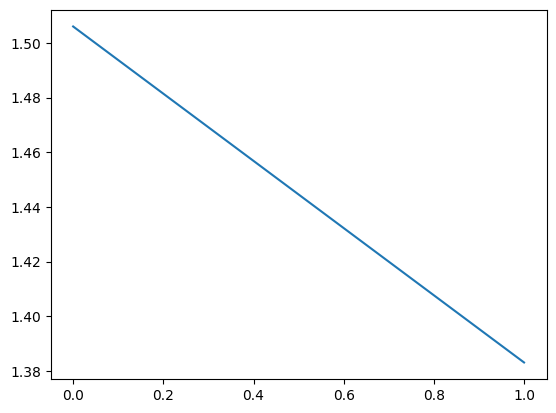

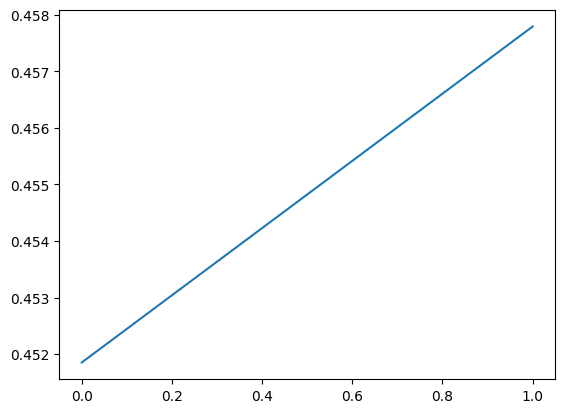

2
[1.9953757524490356, 1.423638105392456, 1.3683568239212036]
[0.3806622624397278, 0.45604848861694336, 0.4586380124092102]
[1.5059902667999268, 1.3831291198730469, 1.359566330909729]
[0.4518530070781708, 0.4577929973602295, 0.4588800072669983]
tensor([[ 1.2559e+01,  1.2665e+01,  1.2633e+01, -3.2430e+01,  1.2262e+01,
          1.6742e+01,  1.6613e+01,  1.1163e+01,  1.2865e+01, -4.3640e+01,
         -3.8668e+01,  9.1929e+00,  4.3946e+00,  1.3139e+01,  1.3278e+01,
         -2.6950e+01, -5.4900e-01, -5.3290e+00, -2.5652e+01,  1.2554e+01,
          1.2525e+01, -1.0381e+01,  1.2359e+01, -1.5769e+01, -1.9549e+01,
          1.2244e+01,  1.7275e+01,  1.2536e+01, -5.3059e+01, -4.5933e+01,
          1.7271e+01,  1.7124e+01,  1.2442e+01,  1.2717e+01,  1.1889e+01,
          1.7577e+01],
        [ 1.4887e+01,  1.0091e+01,  1.0166e+01,  9.4884e+00,  1.4177e+01,
          9.5198e+00,  1.0007e+01,  9.3843e+00,  1.0297e+01, -4.1057e+01,
         -3.6287e+01,  1.0982e+01, -2.6074e+01,  1.0676e+01,  1.53

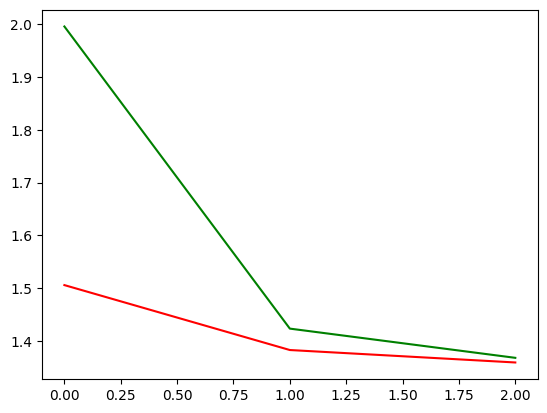

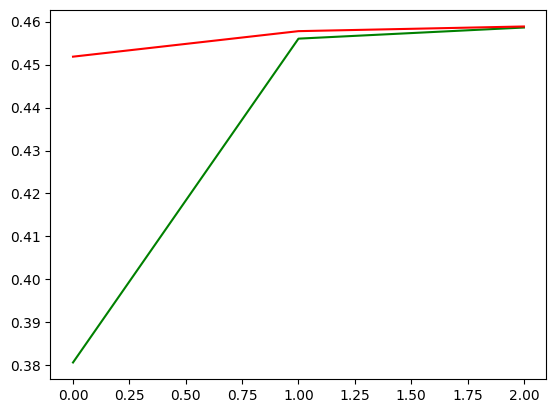

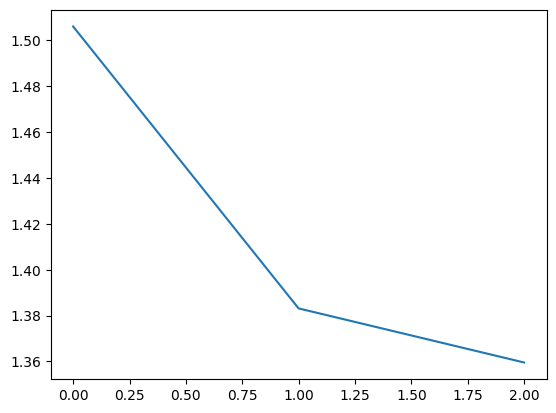

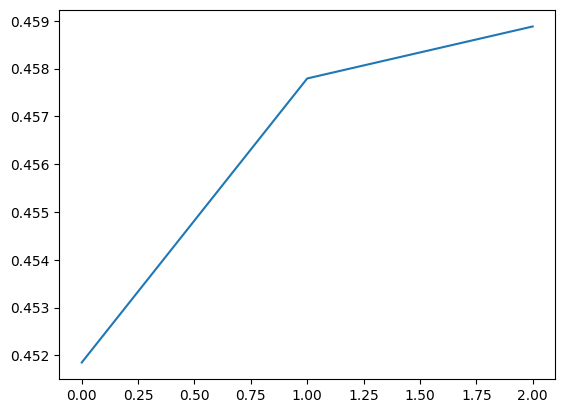

3
[1.9953757524490356, 1.423638105392456, 1.3683568239212036, 1.3543877601623535]
[0.3806622624397278, 0.45604848861694336, 0.4586380124092102, 0.45945701003074646]
[1.5059902667999268, 1.3831291198730469, 1.359566330909729, 1.3512765169143677]
[0.4518530070781708, 0.4577929973602295, 0.4588800072669983, 0.45928698778152466]
tensor([[ 13.5649,  13.6134,  13.5492, -35.3686,  13.1907,  18.0564,  17.9129,
          12.0233,  13.8474, -46.5008, -41.2344,   9.7947,   4.6469,  14.0932,
          14.2527, -29.6332,  -0.8048,  -5.6668, -27.2307,  13.5177,  13.4361,
         -11.3385,  13.3036, -16.8063, -21.2370,  13.1737,  18.6095,  13.5395,
         -56.9560, -49.8454,  18.5731,  18.4585,  13.3967,  13.6389,  12.7674,
          18.9052],
        [ 16.0256,  10.8749,  10.9143,  10.2216,  15.3123,  10.2758,  10.7161,
          10.1135,  11.1035, -43.7417, -38.7094,  11.7604, -28.1677,  11.4409,
          16.4925,  11.0866, -32.2290,  11.6934,   2.7150, -12.5908, -16.3493,
           7.9221,  -

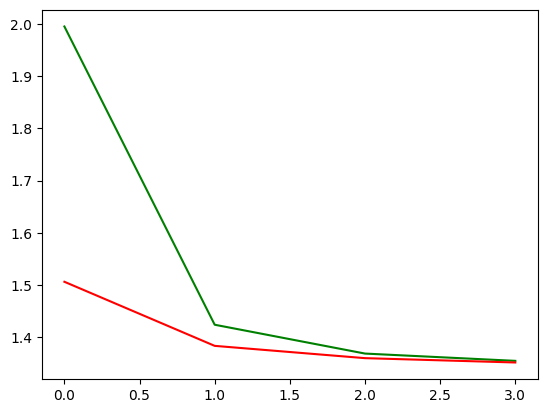

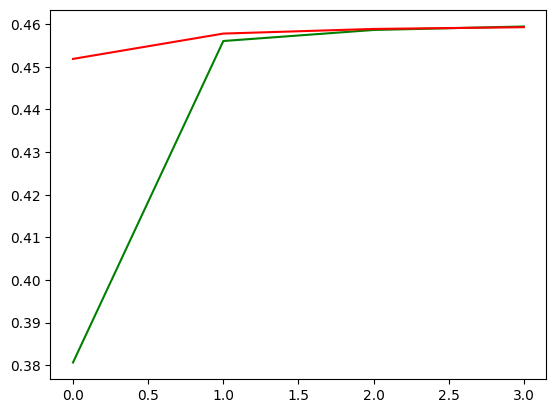

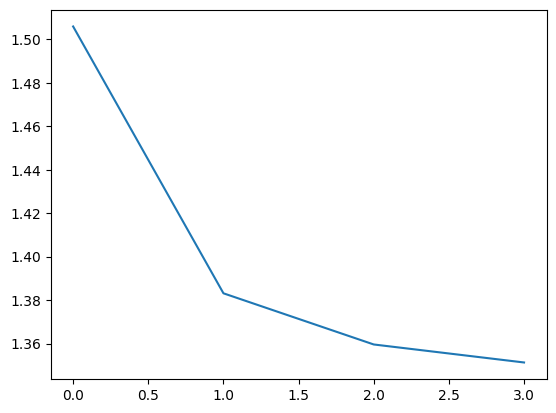

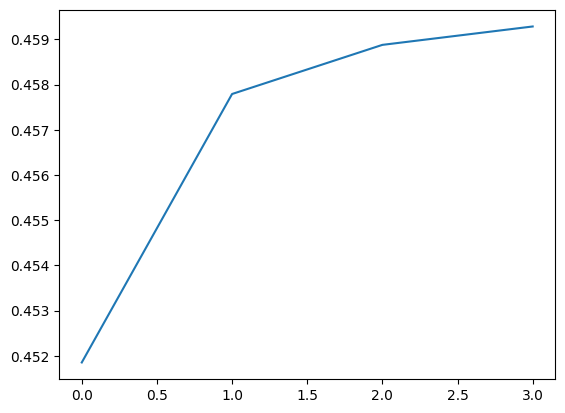

4
[1.9953757524490356, 1.423638105392456, 1.3683568239212036, 1.3543877601623535, 1.3488062620162964]
[0.3806622624397278, 0.45604848861694336, 0.4586380124092102, 0.45945701003074646, 0.45970800518989563]
[1.5059902667999268, 1.3831291198730469, 1.359566330909729, 1.3512765169143677, 1.347425937652588]
[0.4518530070781708, 0.4577929973602295, 0.4588800072669983, 0.45928698778152466, 0.4595159888267517]
tensor([[ 14.2355,  14.2424,  14.1585, -37.3303,  13.8063,  18.9309,  18.7750,
          12.5920,  14.4966, -48.4032, -42.9219,  10.1926,   4.8123,  14.7236,
          14.8961, -31.4275,  -0.9843,  -5.8909, -28.2653,  14.1607,  14.0405,
         -11.9755,  13.9334, -17.4928, -22.3596,  13.7884,  19.4948,  14.2060,
         -59.5358, -52.4371,  19.4363,  19.3449,  14.0286,  14.2467,  13.3470,
          19.7871],
        [ 16.7840,  11.3956,  11.4123,  10.7092,  16.0656,  10.7773,  11.1839,
          10.5944,  11.6372, -45.5261, -40.3016,  12.2757, -29.5547,  11.9464,
          17.2706,  

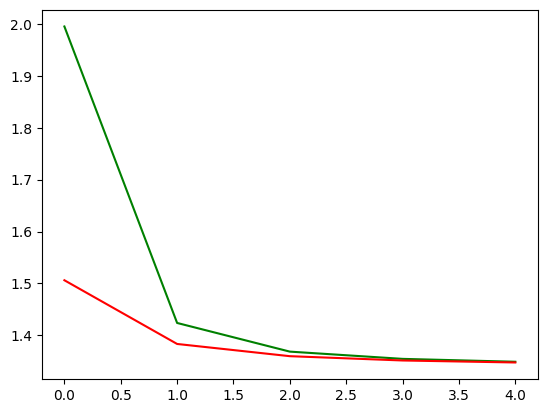

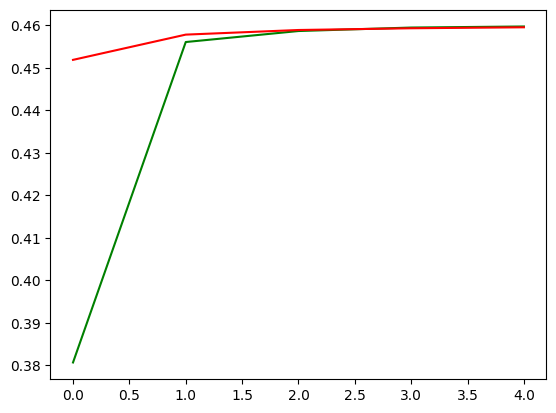

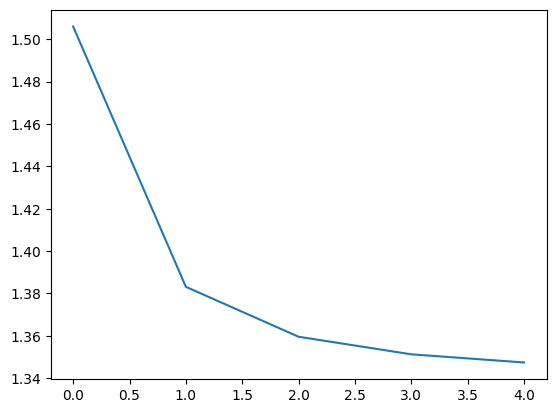

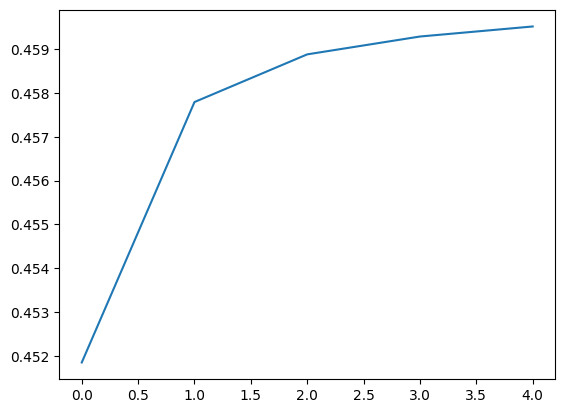

5
[1.423638105392456, 1.3683568239212036, 1.3543877601623535, 1.3488062620162964, 1.346011996269226]
[0.45604848861694336, 0.4586380124092102, 0.45945701003074646, 0.45970800518989563, 0.45990800857543945]
[1.3831291198730469, 1.359566330909729, 1.3512765169143677, 1.347425937652588, 1.3453259468078613]
[0.4577929973602295, 0.4588800072669983, 0.45928698778152466, 0.4595159888267517, 0.45968398451805115]
tensor([[ 14.7082,  14.6839,  14.5876, -38.7144,  14.2384,  19.5467,  19.3807,
          12.9905,  14.9511, -49.7479, -44.0969,  10.4720,   4.9281,  15.1648,
          15.3460, -32.6927,  -1.1149,  -6.0487, -28.9874,  14.6144,  14.4646,
         -12.4231,  14.3775, -17.9752, -23.1482,  14.2192,  20.1167,  14.6741,
         -61.3480, -54.2577,  20.0420,  19.9684,  14.4715,  14.6716,  13.7530,
          20.4071],
        [ 17.3187,  11.7619,  11.7635,  11.0527,  16.5955,  11.1300,  11.5119,
          10.9311,  12.0112, -46.7863, -41.4101,  12.6375, -30.5251,  12.3007,
          17.8168, 

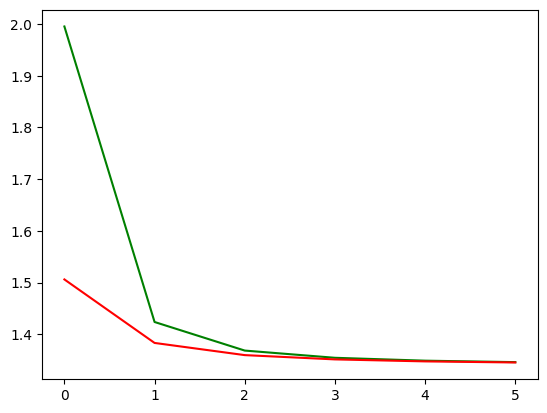

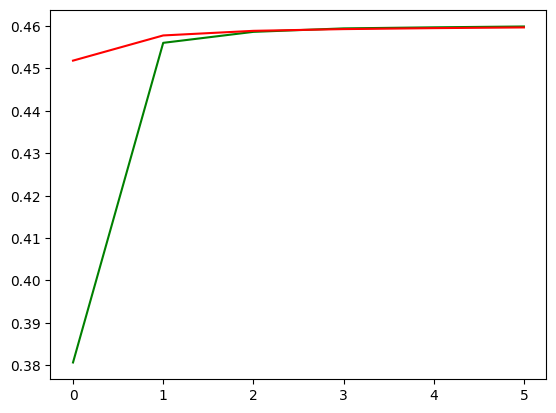

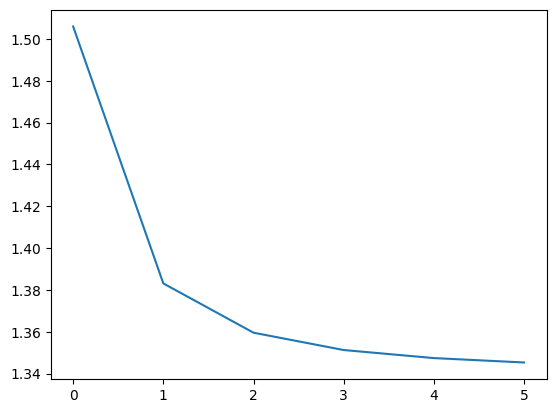

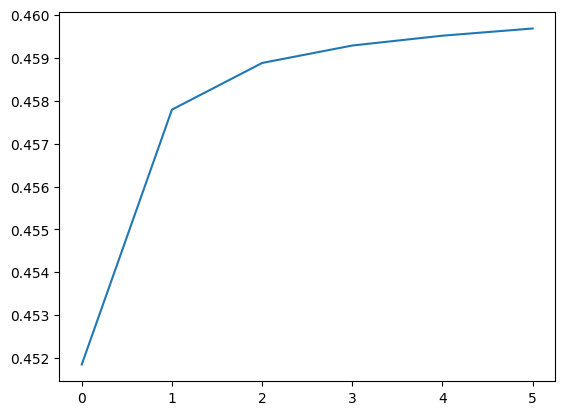

6
[1.3683568239212036, 1.3543877601623535, 1.3488062620162964, 1.346011996269226, 1.3444311618804932]
[0.4586380124092102, 0.45945701003074646, 0.45970800518989563, 0.45990800857543945, 0.45999574661254883]
[1.359566330909729, 1.3512765169143677, 1.347425937652588, 1.3453259468078613, 1.3440531492233276]
[0.4588800072669983, 0.45928698778152466, 0.4595159888267517, 0.45968398451805115, 0.45969700813293457]
tensor([[ 15.0534,  15.0049,  14.9004, -39.7255,  14.5525,  19.9958,  19.8217,
          13.2798,  15.2808, -50.7351, -44.9442,  10.6754,   5.0127,  15.4849,
          15.6721, -33.6149,  -1.2121,  -6.1638, -29.5109,  14.9459,  14.7729,
         -12.7481,  14.7018, -18.3271, -23.7211,  14.5318,  20.5691,  15.0143,
         -62.6689, -55.5848,  20.4823,  20.4226,  14.7931,  14.9793,  14.0478,
          20.8586],
        [ 17.7092,  12.0288,  12.0202,  11.3034,  16.9819,  11.3873,  11.7507,
          11.1757,  12.2829, -47.7107, -42.2091,  12.9010, -31.2271,  12.5582,
          18.2143

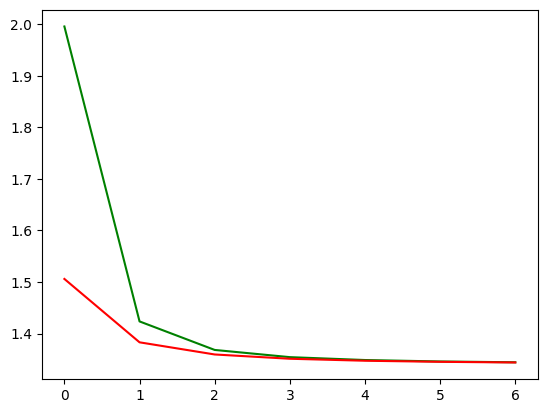

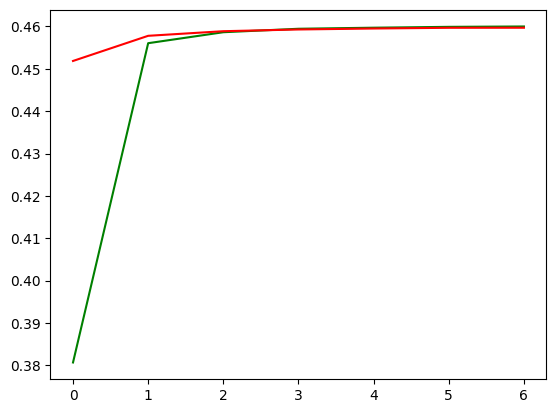

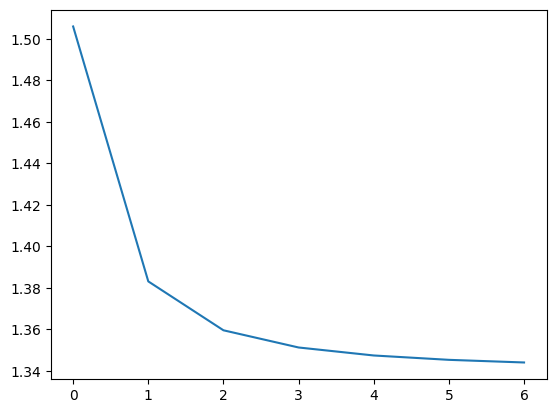

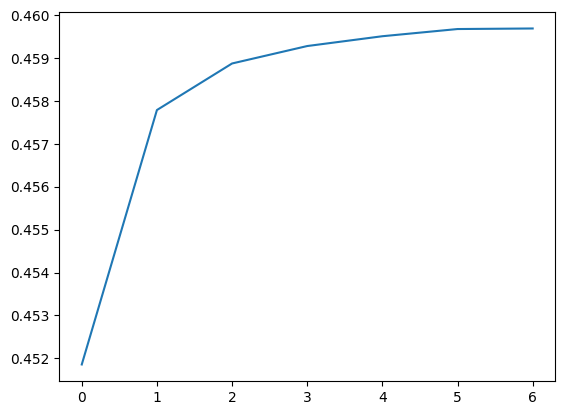

7
[1.3543877601623535, 1.3488062620162964, 1.346011996269226, 1.3444311618804932, 1.3434224128723145]
[0.45945701003074646, 0.45970800518989563, 0.45990800857543945, 0.45999574661254883, 0.46009400486946106]
[1.3512765169143677, 1.347425937652588, 1.3453259468078613, 1.3440531492233276, 1.3432209491729736]
[0.45928698778152466, 0.4595159888267517, 0.45968398451805115, 0.45969700813293457, 0.4597319960594177]
tensor([[ 15.3114,  15.2439,  15.1341, -40.4811,  14.7864,  20.3310,  20.1506,
          13.4948,  15.5257, -51.4783, -45.5693,  10.8273,   5.0762,  15.7227,
          15.9142, -34.3020,  -1.2858,  -6.2499, -29.9000,  15.1936,  15.0023,
         -12.9893,  14.9443, -18.5906, -24.1470,  14.7642,  20.9061,  15.2673,
         -63.6557, -56.5768,  20.8099,  20.7616,  15.0321,  15.2075,  14.2671,
          21.1954],
        [ 18.0013,  12.2281,  12.2125,  11.4909,  17.2705,  11.5796,  11.9287,
          11.3577,  12.4850, -48.4058, -42.7985,  13.0977, -31.7465,  12.7499,
          18.51

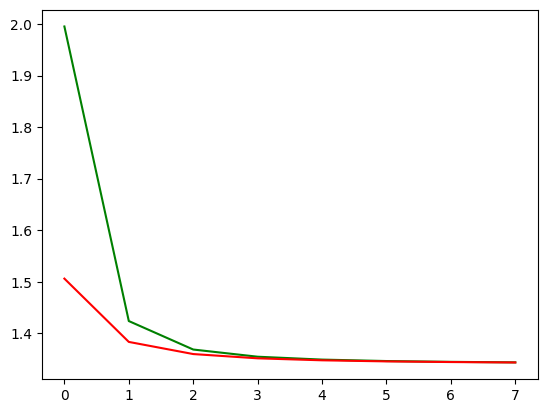

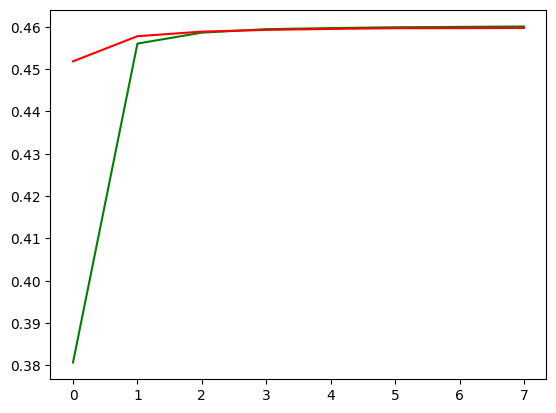

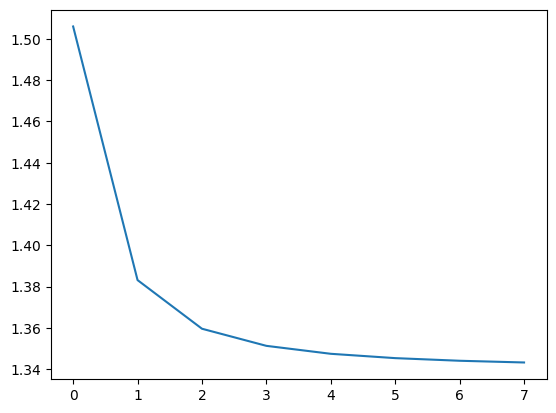

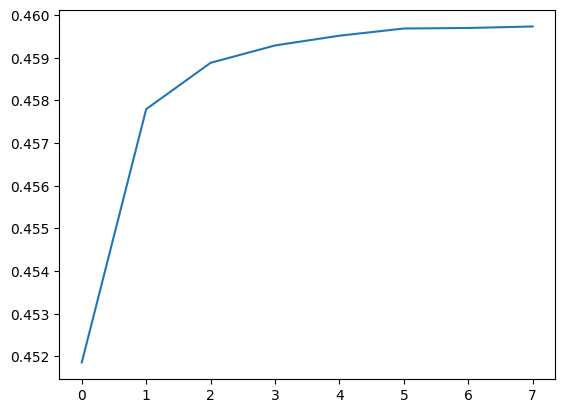

8
[1.3488062620162964, 1.346011996269226, 1.3444311618804932, 1.3434224128723145, 1.342756986618042]
[0.45970800518989563, 0.45990800857543945, 0.45999574661254883, 0.46009400486946106, 0.4601477384567261]
[1.347425937652588, 1.3453259468078613, 1.3440531492233276, 1.3432209491729736, 1.3426458835601807]
[0.4595159888267517, 0.45968398451805115, 0.45969700813293457, 0.4597319960594177, 0.45977598428726196]
tensor([[ 15.5075,  15.4248,  15.3114, -41.0547,  14.9633,  20.5855,  20.4001,
          13.6573,  15.7108, -52.0476, -46.0379,  10.9427,   5.1248,  15.9023,
          16.0969, -34.8219,  -1.3422,  -6.3153, -30.1938,  15.3817,  15.1758,
         -13.1708,  15.1284, -18.7914, -24.4688,  14.9395,  21.1613,  15.4582,
         -64.4056, -57.3316,  21.0576,  21.0186,  15.2125,  15.3795,  14.4332,
          21.4507],
        [ 18.2235,  12.3795,  12.3590,  11.6336,  17.4897,  11.7259,  12.0639,
          11.4956,  12.6379, -48.9376, -43.2401,  13.2471, -32.1366,  12.8951,
          18.7349

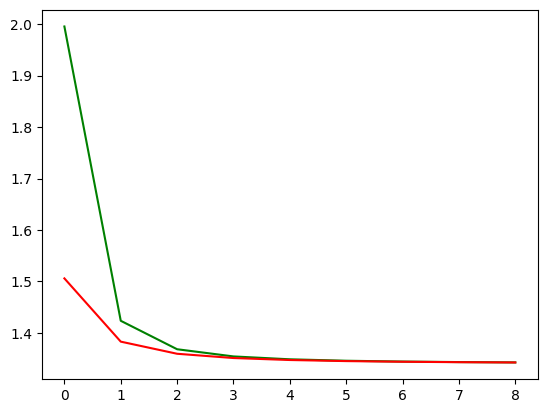

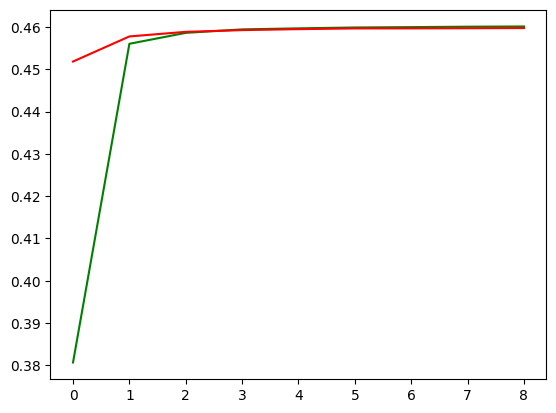

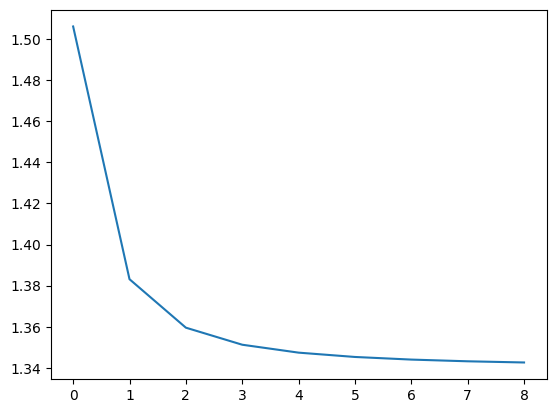

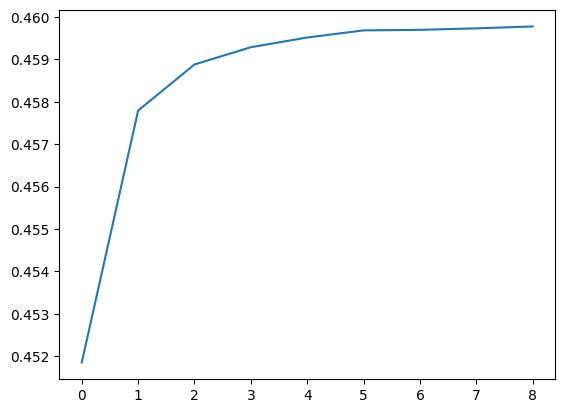

9
[1.346011996269226, 1.3444311618804932, 1.3434224128723145, 1.342756986618042, 1.3422685861587524]
[0.45990800857543945, 0.45999574661254883, 0.46009400486946106, 0.4601477384567261, 0.4601709842681885]
[1.3453259468078613, 1.3440531492233276, 1.3432209491729736, 1.3426458835601807, 1.3422304391860962]
[0.45968398451805115, 0.45969700813293457, 0.4597319960594177, 0.45977598428726196, 0.45981600880622864]
tensor([[ 15.6582,  15.5635,  15.4475, -41.4947,  15.0989,  20.7809,  20.5917,
          13.7816,  15.8523, -52.4891, -46.3932,  11.0314,   5.1625,  16.0396,
          16.2365, -35.2196,  -1.3858,  -6.3656, -30.4181,  15.5261,  15.3086,
         -13.3088,  15.2700, -18.9466, -24.7148,  15.0733,  21.3568,  15.6040,
         -64.9830, -57.9137,  21.2470,  21.2158,  15.3505,  15.5107,  14.5605,
          21.6467],
        [ 18.3948,  12.4959,  12.4720,  11.7436,  17.6584,  11.8387,  12.1678,
          11.6014,  12.7551, -49.3493, -43.5747,  13.3620, -32.4329,  13.0064,
          18.907

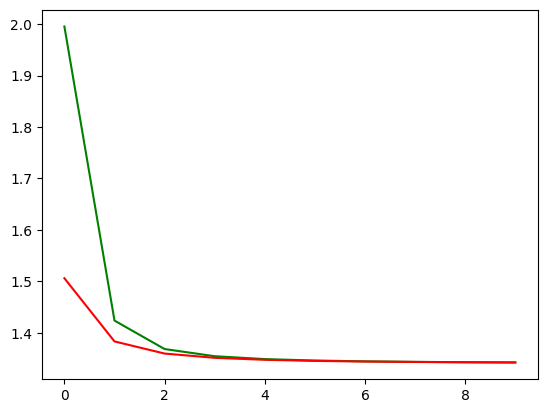

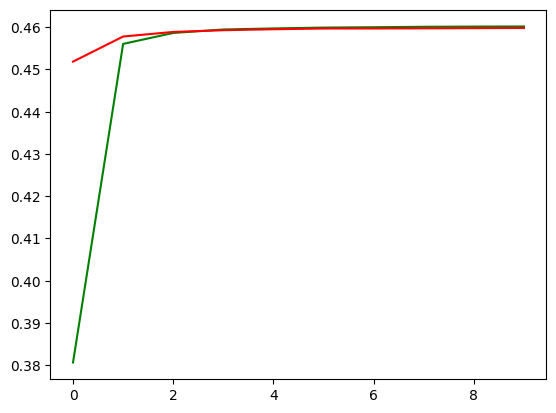

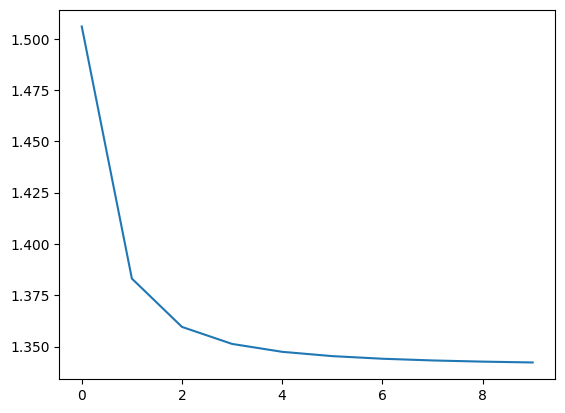

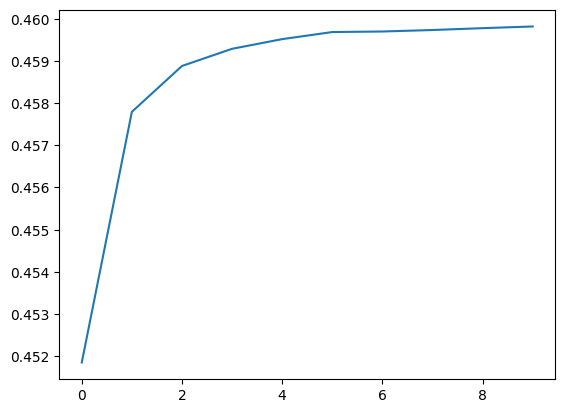

10
[1.3444311618804932, 1.3434224128723145, 1.342756986618042, 1.3422685861587524, 1.3419190645217896]
[0.45999574661254883, 0.46009400486946106, 0.4601477384567261, 0.4601709842681885, 0.460207998752594]
[1.3440531492233276, 1.3432209491729736, 1.3426458835601807, 1.3422304391860962, 1.341920018196106]
[0.45969700813293457, 0.4597319960594177, 0.45977598428726196, 0.45981600880622864, 0.4597730040550232]
tensor([[ 15.7751,  15.6706,  15.5528, -41.8348,  15.2038,  20.9323,  20.7401,
          13.8774,  15.9615, -52.8347, -46.6651,  11.1004,   5.1919,  16.1454,
          16.3440, -35.5261,  -1.4196,  -6.4049, -30.5907,  15.6378,  15.4111,
         -13.4145,  15.3799, -19.0678, -24.9047,  15.1761,  21.5079,  15.7160,
         -65.4319, -58.3672,  21.3930,  21.3684,  15.4567,  15.6116,  14.6589,
          21.7983],
        [ 18.5280,  12.5863,  12.5601,  11.8294,  17.7894,  11.9265,  12.2485,
          11.6834,  12.8458, -49.6710, -43.8303,  13.4513, -32.6599,  13.0926,
          19.0402,

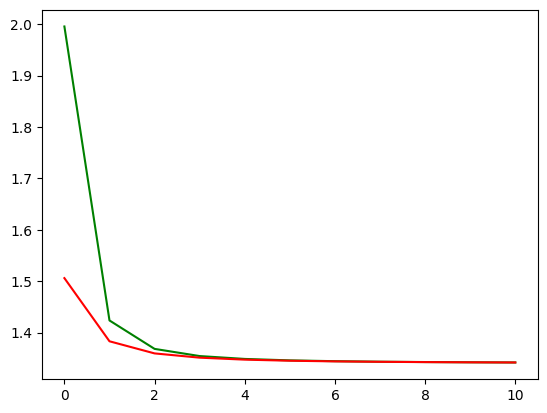

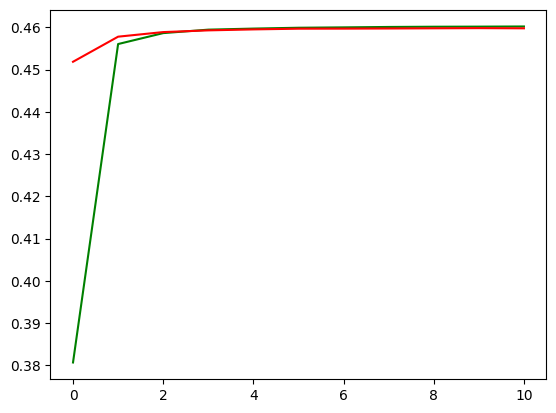

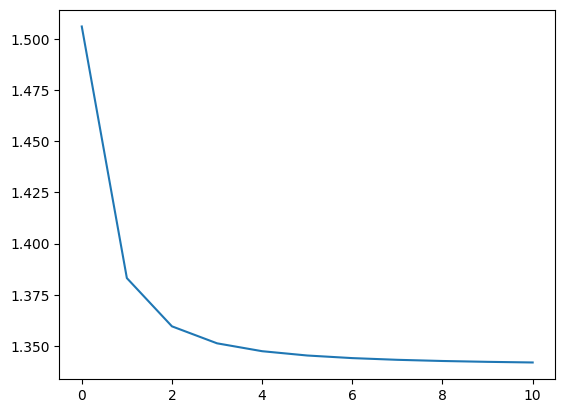

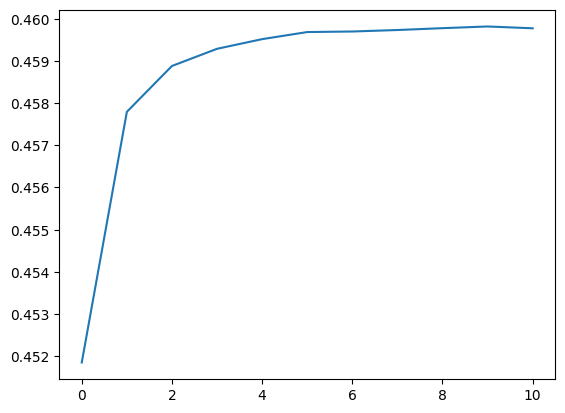

"\nplt.plot(test_loss.cpu())\nplt.savefig('loss_curve_jass_test.png')\nplt.clf()\nplt.plot(test_loss.cpu())\nplt.savefig('acc_curve_jass_test.png')\nplt.clf()\nplt.plot(train_loss.cpu())\nplt.savefig('loss_curve_jass_train.png')\nplt.clf()\nplt.plot(train_loss.cpu())\nplt.savefig('acc_curve_jass_train.png')\nplt.clf()\n"

<Figure size 640x480 with 0 Axes>

In [ ]:
#Neural Network for playing Jass
import torch
import sklearn
from torch import nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_samples = torch.load('/content/x_samples_final.pt')
y_samples = torch.load('/content/y_samples_final.pt')
batch_size = 128
torch.manual_seed(52)
torch.cuda.manual_seed(52)
epochs = 11
acc = 0
train_acc = []
test_acc = []
train_loss = []
test_loss = []
#m = nn.Softmax()
counter = 0

from timeit import default_timer as timer
train_time_start_model_0 = timer()

x_train, x_test, y_train, y_test = train_test_split(x_samples,
                                                    y_samples,
                                                    test_size=0.2)

batches_per_epoch = len(x_train) // batch_size

#test_dataloader = DataLoader(dataset=test)
class jass_bot_module_v0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=42, out_features=80)
    self.act_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=80, out_features=400)
    self.act_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=400, out_features=56)
    self.act_3 = nn.ReLU()
    self.layer_4 = nn.Linear(in_features=56, out_features=36)
    self.act_4 = nn.Sigmoid()

  def forward(self, x):
    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))

model_0 = jass_bot_module_v0().to(device)

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.00005)

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  counter = 0
  train_loss_batch = [0] * batches_per_epoch
  train_acc_batch = [0] * batches_per_epoch
  for i in range(batches_per_epoch):
    start = i * batch_size

    x_batch = x_train[start:start+batch_size]
    y_batch = y_train[start:start+batch_size]

    model_0.train()

    y_pred = model_0(x_batch)
    #y_pred = nn.functional.softmax(y_pred)

    loss = loss_fn(y_pred,
                  y_batch)

    optimizer.zero_grad()
    loss.backward()

    train_loss_batch[counter] = loss

    optimizer.step()

    acc = torch.sum(torch.argmax(y_pred, dim=1) == torch.argmax(y_train[start:start+batch_size], dim=1))
    train_acc_batch[counter] = acc/len(y_pred)

    counter += 1
  train_loss.append(float(sum(train_loss_batch) / len(train_loss_batch)))
  train_acc.append(float(sum(train_acc_batch) / len(train_acc_batch)))
  model_0.eval()
  with torch.inference_mode():

    y_pred = model_0(x_test)
    #y_pred = nn.functional.softmax(y_pred)

    loss = loss_fn(y_pred,
                        y_test)
    test_loss.append(float(loss))

    acc = torch.sum(torch.argmax(y_pred, dim=1) == torch.argmax(y_test, dim=1))
    test_acc.append(float(acc/len(y_pred)))

    if epoch % 1 == 0:
      print(epoch)
      print(train_loss[-5:])
      print(train_acc[-5:])
      print(test_loss[-5:])
      print(test_acc[-5:])
      print(y_pred[-5:])
      print(torch.argmax(y_test[-1:]))
      plt.plot(train_loss, 'g',  test_loss, 'r')
      plt.savefig('loss_curve_jass_train.png')
      plt.show()
      plt.close
      plt.clf()
      plt.plot(train_acc, 'g', test_acc, 'r')
      plt.savefig('acc_curve_jass_train.png')
      plt.show()
      plt.close
      plt.clf()
      plt.plot(test_loss)
      plt.savefig('loss_curve_jass_test.png')
      plt.show()
      plt.close
      plt.clf()
      plt.plot(test_acc)
      plt.savefig('acc_curve_jass_test.png')
      plt.show()
      plt.close
      plt.clf()
      torch.save(model_0.state_dict(), 'model_3_state_dict_final.pt')
      #if sum(test_loss[-5:]) + 0.0005 >= sum(test_loss[-10:-5]) and epoch >=10:
        #break

torch.save(model_0.state_dict(), 'model_3_state_dict_final.pt')

In [ ]:
#Test accuracy with all rules applied to bot
import torch
import sklearn
from torch import nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class jass_bot_module_v0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=42, out_features=80)
    self.act_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=80, out_features=400)
    self.act_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=400, out_features=56)
    self.act_3 = nn.ReLU()
    self.layer_4 = nn.Linear(in_features=56, out_features=36)
    self.act_4 = nn.Sigmoid()

  def forward(self, x):
    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))

def test_model():
  trump = 0
  f_card = 0
  f_card_high = 0
  z = 0
  x = 0
  y = 0
  c = 0
  samples = 100000
  deci = 0

  model = jass_bot_module_v0().to(device)
  model.load_state_dict(torch.load('model_3_state_dict_final.pt', map_location=torch.device('cpu')))

  x_samples = torch.load('x_samples.pt').to(device)
  y_samples = torch.load('y_samples.pt').to(device)

  model.eval()
  with torch.inference_mode():
    y_pred = model(x_samples)
    all_maximas = [0] * samples
    for u in range (samples):
      pos_moves = []
      pos_moves_ind = []
      f_card_high = 0
      f_card = 0
      c = 0
      for i in range (0, 4):
        if x_samples[u][41 - i] == 1:
          trump = i + 1
      for i in range (36):
        if x_samples[u][i] > f_card_high and (x_samples[u][i] % 4 == 0 or x_samples[u][i] % 4 == 1):
          f_card_high = x_samples[u][i]
          z = i
      if f_card_high % 4 == 1:
        f_card = z // 9 + 1
      for i in range (1, 5):
        if i == trump:
          x = i
        if i == f_card:
          y = i
      if y != 0:
        for i in range ((y - 1) * 9, y * 9):
          if x_samples[u][i] == -1:
            pos_moves.append(y_pred[u][i])
            pos_moves_ind.append(i)
            c += 1
        if x != 0 and y != x:
          for i in range ((x - 1) * 9, x * 9):
            if x_samples[u][i] == -1:
              pos_moves.append(y_pred[u][i])
              pos_moves_ind.append(i)
      if c == 0:
        for i in range (36):
          if x_samples[u][i] == -1:
            pos_moves.append(y_pred[u][i])
            pos_moves_ind.append(i)
            c += 1
      #print(x_samples[u], pos_moves_ind, y_samples[u])
      #print(pos_moves, y_pred)
      deci += len(pos_moves)
      all_maximas[u] = pos_moves_ind[pos_moves.index(max(pos_moves))]
      if u % 10000 == 0:
        print(u)
        #acc = torch.sum(torch.argmax(y_samples, dim=1) == torch.tensor(all_maximas).to(device))
    acc = torch.sum(torch.argmax(y_samples[:samples], dim=1) == torch.tensor(all_maximas).to(device))
    raw_acc = torch.sum(torch.argmax(y_samples, dim=1) == torch.argmax(y_pred, dim=1))
    #print(all_maximas)
    #print(torch.argmax(y_samples[:samples], dim=1))
    print(acc/samples)
    print(raw_acc/len(y_pred))
    print(deci/samples)
    print(torch.sum(torch.tensor(all_maximas).to(device) == torch.argmax(y_pred[:samples], dim=1)))



test_model()

<ipython-input-24-699848685c72>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_3_state_dict_final.pt', map_location=torch.device('

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
tensor(0.4922)
tensor(0.4601)
3.09599
tensor(84320)


In [ ]:
#add rules to trump model
import torch
from torch import nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class trump_bot_module_v0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=37, out_features=64)
    self.act_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=64, out_features=32)
    self.act_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=32, out_features=6)
    self.act_3 = nn.Sigmoid()



  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model = trump_bot_module_v0().to(device)
model.load_state_dict(torch.load('model_trump_2_state_dict_final.pt', map_location=torch.device('cpu')))

x_samples = torch.load('x_samples_trump_1_normal.pt', map_location=torch.device('cpu')).to(device)
y_samples = torch.load('y_samples_trump_1_normal.pt', map_location=torch.device('cpu')).to(device)

model.eval()

samples = 100000

L = [0] * samples
deci = 0
counter = 0
with torch.inference_mode():
  y_pred = model(x_samples)
  for u in range (samples):
    deci += 7
    if torch.max(y_pred[u], dim=0)[0] <= 0.6:
      L[u] = 6
      deci -= 1
    else:
      L[u] = torch.argmax(y_pred[u], dim=0)
    if u % 1000 == 0:
      print(x_samples[u])
      print(y_pred[u])
      print(u)
  acc = torch.sum(torch.argmax(y_samples[:samples], dim=1) == torch.tensor(L).to(device))
  print(acc/samples)
  print(deci/samples)

<ipython-input-3-90d64ad63b9a>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_trump_2_state_dict_final.pt', map_location=torch.dev

tensor([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        1.])
tensor([ 0.0366, -0.1994,  0.0377,  0.0354, -0.0040, -0.0377])
0
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0.])
tensor([ 0.5973,  0.4116,  0.2730,  0.2706, -0.8600, -0.8886])
1000
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        1.])
tensor([ 0.0851, -0.1926, -0.0023,  0.0429, -0.0080, -0.0247])
2000
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0.])
tensor([ 0.6092,  0.4596,  0.2631,  0.2432, -0.7774, -0.8251])
3000
tensor([1., 1., 0., 1., 1., 0., 0., 0.,

In [ ]:
#choose trump using formula
import torch
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x_samples = torch.load('x_samples_trump_normal.pt', map_location=torch.device('cpu')).to(device)
y_samples = torch.load('y_samples_trump_normal.pt', map_location=torch.device('cpu')).to(device)

samples_in_begin = 10001
samples = samples_in_begin

y_pred = [0] * samples
y_test = [0] * samples

while samples != 0:
  u = random.randint(0, 1000000)

  diamond = 0
  heart = 0
  spade = 0
  club = 0
  obeabe = 0
  uneufe = 0
  trump_points = [uneufe, obeabe, club, spade, heart, diamond]

  for j in range (4):
    if x_samples[u][j * 9 + 8] == 1:
      trump_points[5 - j] += 15
    if x_samples[u][j * 9 + 7] == 1:
      trump_points[5 - j] += 10
    if x_samples[u][j * 9 + 6] == 1:
      trump_points[5 - j] += 7
    if x_samples[u][j * 9 + 5] == 1:
      trump_points[5 - j] += 25
    if x_samples[u][j * 9 + 4] == 1:
      trump_points[5 - j] += 6
    if x_samples[u][j * 9 + 3] == 1:
      trump_points[5 - j] += 19
    if x_samples[u][j * 9 + 2] == 1:
      trump_points[5 - j] += 5
    if x_samples[u][j * 9 + 1] == 1:
      trump_points[5 - j] += 5
    if x_samples[u][j * 9 + 0] == 1:
      trump_points[5 - j] += 5
    for i in range (0, j):
      if x_samples[u][i * 9 + 8] == 1:
        trump_points[5 - j] += 9
      if x_samples[u][i * 9 + 7] == 1:
        trump_points[5 - j] += 7
      if x_samples[u][i * 9 + 6] == 1:
        trump_points[5 - j] += 5
      if x_samples[u][i * 9 + 5] == 1:
        trump_points[5 - j] += 2
      if x_samples[u][i * 9 + 4] == 1:
        trump_points[5 - j] += 1
    for i in range (j + 1, 4):
      if x_samples[u][i * 9 + 8] == 1:
        trump_points[5 - j] += 9
      if x_samples[u][i * 9 + 7] == 1:
        trump_points[5 - j] += 7
      if x_samples[u][i * 9 + 6] == 1:
        trump_points[5 - j] += 5
      if x_samples[u][i * 9 + 5] == 1:
        trump_points[5 - j] += 2
      if x_samples[u][i * 9 + 4] == 1:
        trump_points[5 - j] += 1
  for j in range (4, 6):
    for i in range (4):
      if j == 4:
        if x_samples[u][i * 9 + 8] == 1:
          trump_points[5 - j] += 14
        if x_samples[u][i * 9 + 7] == 1:
          trump_points[5 - j] += 10
        if x_samples[u][i * 9 + 6] == 1:
          trump_points[5 - j] += 8
        if x_samples[u][i * 9 + 5] == 1:
          trump_points[5 - j] += 7
        if x_samples[u][i * 9 + 4] == 1:
          trump_points[5 - j] += 5
        if x_samples[u][i * 9 + 2] == 1:
          trump_points[5 - j] += 5
      else:
        if x_samples[u][i * 9 + 7] == 1:
          trump_points[5 - j] += 2
        if x_samples[u][i * 9 + 6] == 1:
          trump_points[5 - j] += 1
        if x_samples[u][i * 9 + 5] == 1:
          trump_points[5 - j] += 1
        if x_samples[u][i * 9 + 4] == 1:
          trump_points[5 - j] += 5
        if x_samples[u][i * 9 + 3] == 1:
          trump_points[5 - j] += 5
        if x_samples[u][i * 9 + 2] == 1:
          trump_points[5 - j] += 7
        if x_samples[u][i * 9 + 1] == 1:
          trump_points[5 - j] += 9
        if x_samples[u][i * 9 + 0] == 1:
          trump_points[5 - j] += 11
  if x_samples[u][36] == 0:
    if max(trump_points) <= 65:
      y_pred[samples_in_begin - samples] = 6
    else:
      if max(trump_points) <= 45:
        trump_points[5] = trump_points[5] * 1.5
        trump_points[4] = trump_points[4] * 1.5
        trump_points[3] = trump_points[3] * 1.2
        trump_points[2] = trump_points[2] * 1.2
      elif max(trump_points) <= 60:
        trump_points[5] = trump_points[5] * 1.2
        trump_points[4] = trump_points[4] * 1.2
        trump_points[3] = trump_points[3] * 1.1
        trump_points[2] = trump_points[2] * 1.1
      elif max(trump_points) > 75:
        trump_points[0] = trump_points[0] * 1.5
        trump_points[1] = trump_points[1] * 1.5
        trump_points[3] = trump_points[3] * 1.2
        trump_points[2] = trump_points[2] * 1.2
      y_pred[samples_in_begin - samples] = trump_points.index(max(trump_points))
  else:
    if max(trump_points) <= 45:
      trump_points[5] = trump_points[5] * 1.5
      trump_points[4] = trump_points[4] * 1.5
      trump_points[3] = trump_points[3] * 1.2
      trump_points[2] = trump_points[2] * 1.2
    elif max(trump_points) <= 60:
      trump_points[5] = trump_points[5] * 1.2
      trump_points[4] = trump_points[4] * 1.2
      trump_points[3] = trump_points[3] * 1.1
      trump_points[2] = trump_points[2] * 1.1
    elif max(trump_points) > 75:
      trump_points[0] = trump_points[0] * 1.5
      trump_points[1] = trump_points[1] * 1.5
      trump_points[3] = trump_points[3] * 1.2
      trump_points[2] = trump_points[2] * 1.2
    y_pred[samples_in_begin - samples] = trump_points.index(max(trump_points))
  for i in range (7):
    if 1 == y_samples[u][i]:
      y_test[samples_in_begin - samples] = i
  '''
  print(x_samples[u])
  print(y_samples[u])
  if y_pred[samples_in_begin - samples] != 6:
    print(trump_points[y_pred[samples_in_begin - samples]])
  '''
  if samples % 1000 == 1:
    print(samples)
    print(torch.FloatTensor(y_test[:samples_in_begin - samples + 1]).to(device))
    print( torch.FloatTensor(y_pred[:samples_in_begin - samples + 1]).to(device))
    print(torch.sum(torch.Tensor(y_test[:samples_in_begin - samples + 1]).to(device) == torch.Tensor(y_pred[:samples_in_begin - samples + 1]).to(device)) / len(y_pred[:samples_in_begin - samples + 1]))
    print(torch.sum(torch.FloatTensor(y_pred[:samples_in_begin - samples + 1]).to(device) == 6))
  samples -= 1

#83 377
#85 38




<ipython-input-30-58bb4d8d55f4>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_samples = torch.load('x_samples_trump_normal.pt', map_location=torch.device('cpu')).to(dev

10001
tensor([2.])
tensor([3.])
tensor(0.)
tensor(0)
9001
tensor([2., 0., 3.,  ..., 0., 4., 6.])
tensor([3., 1., 6.,  ..., 0., 5., 6.])
tensor(0.3896)
tensor(446)
8001
tensor([2., 0., 3.,  ..., 0., 0., 6.])
tensor([3., 1., 6.,  ..., 2., 1., 1.])
tensor(0.3873)
tensor(876)
7001
tensor([2., 0., 3.,  ..., 6., 6., 1.])
tensor([3., 1., 6.,  ..., 6., 6., 1.])
tensor(0.3885)
tensor(1322)
6001
tensor([2., 0., 3.,  ..., 2., 4., 4.])
tensor([3., 1., 6.,  ..., 3., 6., 6.])
tensor(0.3832)
tensor(1748)
5001
tensor([2., 0., 3.,  ..., 5., 1., 4.])
tensor([3., 1., 6.,  ..., 3., 6., 6.])
tensor(0.3867)
tensor(2186)
4001
tensor([2., 0., 3.,  ..., 3., 6., 1.])
tensor([3., 1., 6.,  ..., 3., 6., 4.])
tensor(0.3884)
tensor(2610)
3001
tensor([2., 0., 3.,  ..., 0., 0., 0.])
tensor([3., 1., 6.,  ..., 5., 1., 6.])
tensor(0.3867)
tensor(3041)
2001
tensor([2., 0., 3.,  ..., 5., 6., 3.])
tensor([3., 1., 6.,  ..., 1., 6., 6.])
tensor(0.3893)
tensor(3492)
1001
tensor([2., 0., 3.,  ..., 6., 2., 1.])
tensor([3., 1., 6

In [ ]:
#Play Jass versus Model
import torch
import random
from torch import nn
import os

class trump_bot_module_v0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=37, out_features=64)
    self.act_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=64, out_features=32)
    self.act_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=32, out_features=7)
    self.act_3 = nn.Sigmoid()



  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))


class jass_bot_module_v3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=42, out_features=80)
    self.act_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=80, out_features=400)
    self.act_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=400, out_features=56)
    self.act_3 = nn.ReLU()
    self.layer_4 = nn.Linear(in_features=56, out_features=36)
    self.act_4 = nn.Sigmoid()

  def forward(self, x):
    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))

def check_points():
  points = []
  for i in range (0,4):
    a = 0
    for j in range (0, len(winners[i])):
      if trump == 0:
        if card_dict[winners[i][j]][1] == 2:
          a = a + 8
        if card_dict[winners[i][j]][1] == 4:
          a = a + 10
        if card_dict[winners[i][j]][1] == 5:
          a = a + 2
        if card_dict[winners[i][j]][1] == 6:
          a = a + 3
        if card_dict[winners[i][j]][1] == 7:
          a = a + 4
        if card_dict[winners[i][j]][1] == 0:
          a = a + 11
      elif trump == 1:
        if card_dict[winners[i][j]][1] == 2:
          a = a + 8
        if card_dict[winners[i][j]][1] == 4:
          a = a + 10
        if card_dict[winners[i][j]][1] == 5:
          a = a + 2
        if card_dict[winners[i][j]][1] == 6:
          a = a + 3
        if card_dict[winners[i][j]][1] == 7:
          a = a + 4
        if card_dict[winners[i][j]][1] == 8:
          a = a + 11
      else:
        if 5 - card_dict[winners[i][j]][0] != trump:
          if card_dict[winners[i][j]][1] == 4:
            a = a + 10
          if card_dict[winners[i][j]][1] == 5:
            a = a + 2
          if card_dict[winners[i][j]][1] == 6:
            a = a + 3
          if card_dict[winners[i][j]][1] == 7:
            a = a + 4
          if card_dict[winners[i][j]][1] == 8:
            a = a + 11
        else:
          if card_dict[winners[i][j]][1] == 3:
            a = a + 14
          if card_dict[winners[i][j]][1] == 4:
            a = a + 10
          if card_dict[winners[i][j]][1] == 5:
            a = a + 20
          if card_dict[winners[i][j]][1] == 6:
            a = a + 3
          if card_dict[winners[i][j]][1] == 7:
            a = a + 4
          if card_dict[winners[i][j]][1] == 8:
            a = a + 11
    if trump == 2 or trump == 3:
      a = a * 2
    if trump == 0 or trump == 1:
      a = a * 3
    points.append(a)
  return points

def check_trick():
    a=0
    strength = []
    for p in range(len(cards_played)):
      a = 0
      if trump != 0:
            a = a + card_dict[cards_played[p]][1]
            if 5 - card_dict[cards_played[p]][0] == trump:
              a = a + int(20)
              if card_dict[cards_played[p]][1] == 3:
                a = a + 15
              if card_dict[cards_played[p]][1] == 5:
                a = a + 20
      else:
        a = a - card_dict[cards_played[p]][1]
      if card_dict[cards_played[p]][0] != card_dict[cards_played[0]][0] and 5 - card_dict[cards_played[p]][0] != trump:
        a = -10
      strength.append(a)
    winner = start_p - 1 + strength.index(max(strength))
    for i in range (20):
      print('')
    if winner >= 4:
      winner = winner - 4
    if winner == 0:
      winner1.extend(cards_played)
      print("Player1 wins")
    if winner == 1:
      winner2.extend(cards_played)
      print("Player2 wins")
    if winner == 2:
      winner3.extend(cards_played)
      print("Player3 wins")
    if winner == 3:
      winner4.extend(cards_played)
      print("Player4 wins")
    return winner

def play_card(start_p, trump):
  if players[start_p - 1] == 1:
    b = 0
    for i in range(20):
      print('')
    print("Player", start_p)
    input("press any button")
    try:
      int(last_winner)
    except ValueError:
      print("None")
    else:
      print('Player', last_winner, 'won')
    print(trumps[trump])
    print(cards_played)
    print(hands[start_p - 1])
    while b == 0:
      try:
        card_played = int(input("choose card to play, 1 = left most card, 2 = second card from the left, ...")) - 1
        if len(cards_played) != 0:
          for i in range (len(hands[start_p - 1])):
            if card_dict[hands[start_p - 1][i]][0] == card_dict[cards_played[0]][0]:
              if (card_dict[hands[start_p - 1][card_played]][0] == card_dict[cards_played[0]][0]) or (5 - card_dict[hands[start_p - 1][card_played]][0] == trump):
                b = 1
                break
              else:
                b = 0
                break
              b = 1
            else:
              b = 1
        else:
          b = 1
      except ValueError:
        print('try again')
  else:
    with torch.inference_mode():
      y_pred_hand = module_jass(x_tensors_hand[start_p - 1])
      #check only if Jass rules apply
      pos_moves = []
      pos_moves_ind = []
      f_card_high = 0
      f_card = 0
      c = 0
      x = 0
      z = 0
      y = 0
      t = 0
      for i in range (0, 4):
        if x_tensors_hand[start_p - 1][0][41 - i] == 1:
          t = i + 1
      for i in range (36):
        if x_tensors_hand[start_p - 1][0][i] > f_card_high and (x_tensors_hand[start_p - 1][0][i] % 4 == 0 or x_tensors_hand[start_p - 1][0][i] % 4 == 1):
          f_card_high = x_tensors_hand[start_p - 1][0][i]
          z = i
      if f_card_high % 4 == 1:
        f_card = z // 9 + 1
      for i in range (1, 5):
        if i == t:
          x = i
        if i == f_card:
          y = i
      if y != 0:
        for i in range ((y - 1) * 9, y * 9):
          if x_tensors_hand[start_p - 1][0][i] == -1:
            pos_moves.append(y_pred_hand[0][i])
            pos_moves_ind.append(i)
            c += 1
        if x != 0 and y != x:
          for i in range ((x - 1) * 9, x * 9):
            if x_tensors_hand[start_p - 1][0][i] == -1:
              pos_moves.append(y_pred_hand[0][i])
              pos_moves_ind.append(i)
      if c == 0:
        for i in range (36):
          if x_tensors_hand[start_p - 1][0][i] == -1:
            pos_moves.append(y_pred_hand[0][i])
            pos_moves_ind.append(i)
            c += 1
      #print(pos_moves_ind)
      card_played = pos_moves_ind[pos_moves.index(max(pos_moves))]
      for i in range (len(hands[start_p - 1])):
        if card_played == card_dict[hands[start_p - 1][i]][0] * 9 + card_dict[hands[start_p - 1][i]][1]:
          card_played = i
      #print(card_played)
      #print(hands[start_p - 1])
  return card_played

def choose_trump(start_p, trump, gschobe):
  trump_values_tss = []
  if players[start_p - 1] == 1:
    for i in range (20):
      print('')
    print("Player", start_p)
    input("press any button")
    print(hands[start_p - 1])
    while trump != 0 and trump != 1 and trump != 2 and trump != 3 and trump != 4 and trump != 5:
      try:
        trump = int(input("choose trump, Uneufe = 1, Obeabe = 2, Club = 3, Spade = 4, Heart = 5, Diamond = 6, Schiebe = 7")) - 1
        if trump == 6:
          if gschobe == 0:
            print("gschobe")
            if start_p == 3 or start_p == 4:
              start_p = start_p - 2
              x_tensors_trump[start_p - 1][0][36] = 1
              gschobe = 1
              trump = choose_trump(start_p, trump, gschobe)
              start_p = start_p + 2
            else:
              start_p = start_p + 2
              x_tensors_trump[start_p - 1][0][36] = 1
              gschobe = 1
              trump = choose_trump(start_p, trump, gschobe)
              start_p = start_p - 2
      except ValueError:
        print('try again')
  else:
    '''
    with torch.inference_mode():
      y_pred_trump = module_trump(x_tensors_trump[start_p - 1])
      y_pred_trump[0][6] -= 0.53
      while trump != 0 and trump != 1 and trump != 2 and trump != 3 and trump != 4 and trump != 5:
        if x_tensors_trump[start_p - 1][0][36] == 1:
          for i in range (6):
            trump_values_tss.append(y_pred_trump[0][i])
          trump = trump_values_tss.index(max(trump_values_tss))
        else:
          trump = torch.argmax(y_pred_trump, dim = 1).item()
        if trump == 6:
          if start_p == 3 or start_p == 4:
              start_p = start_p - 2
              x_tensors_trump[start_p - 1][0][36] = 1
              gschobe = 1
              print("gschobe")
              trump = choose_trump(start_p, trump, gschobe)
              start_p = start_p + 2
          else:
            start_p = start_p + 2
            x_tensors_trump[start_p - 1][0][36] = 1
            gschobe = 1
            print("gschobe")
            trump = choose_trump(start_p, trump, gschobe)
            start_p = start_p - 2
    '''
  gsch = 0
  while trump != 0 and trump != 1 and trump != 2 and trump != 3 and trump != 4 and trump != 5:
    diamond = 0
    heart = 0
    spade = 0
    club = 0
    obeabe = 0
    uneufe = 0
    trump_points = [uneufe, obeabe, club, spade, heart, diamond]

    for j in range (4):
      if x_tensors_trump[start_p - 1][0][j * 9 + 8] == 1:
        trump_points[5 - j] += 15
      if x_tensors_trump[start_p - 1][0][j * 9 + 7] == 1:
        trump_points[5 - j] += 10
      if x_tensors_trump[start_p - 1][0][j * 9 + 6] == 1:
        trump_points[5 - j] += 7
      if x_tensors_trump[start_p - 1][0][j * 9 + 5] == 1:
        trump_points[5 - j] += 25
      if x_tensors_trump[start_p - 1][0][j * 9 + 4] == 1:
        trump_points[5 - j] += 6
      if x_tensors_trump[start_p - 1][0][j * 9 + 3] == 1:
        trump_points[5 - j] += 19
      if x_tensors_trump[start_p - 1][0][j * 9 + 2] == 1:
        trump_points[5 - j] += 5
      if x_tensors_trump[start_p - 1][0][j * 9 + 1] == 1:
        trump_points[5 - j] += 5
      if x_tensors_trump[start_p - 1][0][j * 9 + 0] == 1:
        trump_points[5 - j] += 5
      for i in range (0, j):
        if x_tensors_trump[start_p - 1][0][i * 9 + 8] == 1:
          trump_points[5 - j] += 9
        if x_tensors_trump[start_p - 1][0][i * 9 + 7] == 1:
          trump_points[5 - j] += 7
        if x_tensors_trump[start_p - 1][0][i * 9 + 6] == 1:
          trump_points[5 - j] += 5
        if x_tensors_trump[start_p - 1][0][i * 9 + 5] == 1:
          trump_points[5 - j] += 2
        if x_tensors_trump[start_p - 1][0][i * 9 + 4] == 1:
          trump_points[5 - j] += 1
      for i in range (j + 1, 4):
        if x_tensors_trump[start_p - 1][0][i * 9 + 8] == 1:
          trump_points[5 - j] += 9
        if x_tensors_trump[start_p - 1][0][i * 9 + 7] == 1:
          trump_points[5 - j] += 7
        if x_tensors_trump[start_p - 1][0][i * 9 + 6] == 1:
          trump_points[5 - j] += 5
        if x_tensors_trump[start_p - 1][0][i * 9 + 5] == 1:
          trump_points[5 - j] += 2
        if x_tensors_trump[start_p - 1][0][i * 9 + 4] == 1:
          trump_points[5 - j] += 1
    for j in range (4, 6):
      for i in range (4):
        if j == 4:
          if x_tensors_trump[start_p - 1][0][i * 9 + 8] == 1:
            trump_points[5 - j] += 14
          if x_tensors_trump[start_p - 1][0][i * 9 + 7] == 1:
            trump_points[5 - j] += 10
          if x_tensors_trump[start_p - 1][0][i * 9 + 6] == 1:
            trump_points[5 - j] += 8
          if x_tensors_trump[start_p - 1][0][i * 9 + 5] == 1:
            trump_points[5 - j] += 7
          if x_tensors_trump[start_p - 1][0][i * 9 + 4] == 1:
            trump_points[5 - j] += 5
          if x_tensors_trump[start_p - 1][0][i * 9 + 2] == 1:
            trump_points[5 - j] += 5
        else:
          if x_tensors_trump[start_p - 1][0][i * 9 + 7] == 1:
            trump_points[5 - j] += 2
          if x_tensors_trump[start_p - 1][0][i * 9 + 6] == 1:
            trump_points[5 - j] += 1
          if x_tensors_trump[start_p - 1][0][i * 9 + 5] == 1:
            trump_points[5 - j] += 1
          if x_tensors_trump[start_p - 1][0][i * 9 + 4] == 1:
            trump_points[5 - j] += 5
          if x_tensors_trump[start_p - 1][0][i * 9 + 3] == 1:
            trump_points[5 - j] += 5
          if x_tensors_trump[start_p - 1][0][i * 9 + 2] == 1:
            trump_points[5 - j] += 7
          if x_tensors_trump[start_p - 1][0][i * 9 + 1] == 1:
            trump_points[5 - j] += 9
          if x_tensors_trump[start_p - 1][0][i * 9 + 0] == 1:
            trump_points[5 - j] += 11
    if x_tensors_trump[start_p - 1][0][36] == 0:
      if max(trump_points) <= 65:
        y_pred_trump = 6
      else:
        if max(trump_points) <= 45:
          trump_points[5] = trump_points[5] * 1.5
          trump_points[4] = trump_points[4] * 1.5
          trump_points[3] = trump_points[3] * 1.2
          trump_points[2] = trump_points[2] * 1.2
        elif max(trump_points) <= 60:
          trump_points[5] = trump_points[5] * 1.2
          trump_points[4] = trump_points[4] * 1.2
          trump_points[3] = trump_points[3] * 1.1
          trump_points[2] = trump_points[2] * 1.1
        elif max(trump_points) > 75:
          trump_points[0] = trump_points[0] * 1.5
          trump_points[1] = trump_points[1] * 1.5
          trump_points[3] = trump_points[3] * 1.2
          trump_points[2] = trump_points[2] * 1.2
        y_pred_trump = trump_points.index(max(trump_points))
    else:
      if max(trump_points) <= 45:
        trump_points[5] = trump_points[5] * 1.5
        trump_points[4] = trump_points[4] * 1.5
        trump_points[3] = trump_points[3] * 1.2
        trump_points[2] = trump_points[2] * 1.2
      elif max(trump_points) <= 60:
        trump_points[5] = trump_points[5] * 1.2
        trump_points[4] = trump_points[4] * 1.2
        trump_points[3] = trump_points[3] * 1.1
        trump_points[2] = trump_points[2] * 1.1
      elif max(trump_points) > 75:
        trump_points[0] = trump_points[0] * 1.5
        trump_points[1] = trump_points[1] * 1.5
        trump_points[3] = trump_points[3] * 1.2
        trump_points[2] = trump_points[2] * 1.2
      y_pred_trump = trump_points.index(max(trump_points))
    trump = y_pred_trump
    if trump == 6:
      gsch = 1
      if start_p == 3 or start_p == 4:
        start_p = start_p - 2
        x_tensors_trump[start_p - 1][0][36] = 1
        print("gschobe")
        trump = choose_trump(start_p, trump, gschobe)
        start_p = start_p + 2
      else:
        start_p = start_p + 2
        x_tensors_trump[start_p - 1][0][36] = 1
        print("gschobe")
        trump = choose_trump(start_p, trump, gschobe)
        start_p = start_p - 2
    return trump

from google.colab import drive
from google.colab import files

drive.mount("/content/drive")

g_over = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
module_trump = trump_bot_module_v0().to(device)
module_jass = jass_bot_module_v3().to(device)
if device == torch.device("cuda"):
  #module_trump.load_state_dict(torch.load('/content/drive/MyDrive/model_trump_0_state_dict_final.pt'))
  module_jass.load_state_dict(torch.load('/content/drive/MyDrive/model_3_state_dict_final.pt'))
else:
  #module_trump.load_state_dict(torch.load('/content/drive/MyDrive/model_trump_0_state_dict_final.pt', map_location=torch.device('cpu')))
  module_jass.load_state_dict(torch.load('/content/drive/MyDrive/model_3_state_dict_final.pt', map_location=torch.device('cpu')))
module_trump.eval()
module_jass.eval()

card_dict = {'Diamond6' : [0, 0], 'Diamond7' : [0, 1], 'Diamond8' : [0, 2], 'Diamond9' : [0, 3], 'Diamond10' : [0, 4], 'DiamondJack' : [0, 5], 'DiamondQueen' : [0, 6], 'DiamondKing' : [0, 7], 'DiamondAce' : [0, 8], 'Heart6' : [1, 0], 'Heart7' : [1, 1], 'Heart8' : [1, 2], 'Heart9' : [1, 3], 'Heart10' : [1, 4], 'HeartJack' : [1, 5], 'HeartQueen' : [1, 6], 'HeartKing' : [1, 7], 'HeartAce' : [1, 8], 'Spade6' : [2, 0], 'Spade7' : [2, 1], 'Spade8' : [2, 2], 'Spade9' : [2, 3], 'Spade10' : [2, 4], 'SpadeJack' : [2, 5], 'SpadeQueen' : [2, 6], 'SpadeKing' : [2, 7], 'SpadeAce' : [2, 8], 'Club6' : [3, 0], 'Club7' : [3, 1], 'Club8' : [3, 2], 'Club9' : [3, 3], 'Club10' : [3, 4], 'ClubJack' : [3, 5], 'ClubQueen' : [3, 6], 'ClubKing' : [3, 7], 'ClubAce' : [3, 8]}
trumps = {5 : ['Diamond'], 4 : ['Heart'], 3 : ['Spade'], 2 : ['Club'], 1 : ['Obeabe'], 0 : ['Uneufe']}
team_1_points = 0
team_2_points = 0

players = []
start_p = 0
last_winner = 'None'

winner1 = []
winner2 = []
winner3 = []
winner4 = []
winners = [winner1, winner2, winner3, winner4]

var = 0

while var == 0:
  try:
    points_to_win = int(input("points to win 'normally 2500'"))
    var = 1
  except ValueError:
    print('try again')

for i in range (4):
  hello = 0
  while hello != 1:
    try:
      print("Player", i + 1, "=", end=" " )
      players.append(int(input("0 = Bot, 1 = Player ")))
      if players[i] == 0 or players[i] == 1:
        hello = 1
      else:
        players.pop(i)
    except ValueError:
      print('try again')

while start_p != 1 and start_p != 2 and start_p != 3 and start_p != 4:
  try:
    start_p = int(input("Player to start: 1 = P1, 2 = P2, 3 = P3, 4 = P4"))
    trump_player = start_p
  except ValueError:
    print('try again')

#game loop
while team_1_points < points_to_win and team_2_points < points_to_win:
  check_match_1 = 0
  check_match_2 = 0
  start_p = trump_player

  x_trump_1 = torch.zeros(1, 37).to(device)
  x_trump_2 = torch.zeros(1, 37).to(device)
  x_trump_3 = torch.zeros(1, 37).to(device)
  x_trump_4 = torch.zeros(1, 37).to(device)
  x_tensors_trump = [x_trump_1, x_trump_2, x_trump_3, x_trump_4]
  x_hand_1 = torch.zeros(1, 42).to(device)
  x_hand_2 = torch.zeros(1, 42).to(device)
  x_hand_3 = torch.zeros(1, 42).to(device)
  x_hand_4 = torch.zeros(1, 42).to(device)
  x_tensors_hand = [x_hand_1, x_hand_2, x_hand_3, x_hand_4]

  trump = -1
  card_played = 0
  counter = 1
  cards_played = []
  played = False

  P1_hand = []
  P2_hand = []
  P3_hand = []
  P4_hand = []

  P1_hand_sorted = []
  P2_hand_sorted = []
  P3_hand_sorted = []
  P4_hand_sorted = []

  hands = [P1_hand, P2_hand, P3_hand, P4_hand]

  cards = ['Diamond6', 'Diamond7', 'Diamond8', 'Diamond9', 'Diamond10', 'DiamondJack', 'DiamondQueen', 'DiamondKing', 'DiamondAce', 'Heart6', 'Heart7', 'Heart8', 'Heart9', 'Heart10', 'HeartJack', 'HeartQueen', 'HeartKing', 'HeartAce', 'Spade6', 'Spade7', 'Spade8', 'Spade9', 'Spade10', 'SpadeJack', 'SpadeQueen', 'SpadeKing', 'SpadeAce', 'Club6', 'Club7', 'Club8', 'Club9', 'Club10', 'ClubJack', 'ClubQueen', 'ClubKing', 'ClubAce']

  for i in range(9):
    x = cards.pop(random.randint(0, len(cards) - 1))
    P1_hand.append(x)
    y = cards.pop(random.randint(0, len(cards) - 1))
    P2_hand.append(y)
    z = cards.pop(random.randint(0, len(cards) - 1))
    P3_hand.append(z)
    w = cards.pop(random.randint(0, len(cards) - 1))
    P4_hand.append(w)

    for j in range (4):
      x_tensors_trump[j][0][card_dict[hands[j][i]][0] * 9 + card_dict[hands[j][i]][1]] = 1
      x_tensors_hand[j][0][card_dict[hands[j][i]][0] * 9 + card_dict[hands[j][i]][1]] = -1

  for k in range (4):
    for i in range(9):
        for j in range(0, 9 - i - 1):
            if card_dict[hands[k][j]][0] * 9 + card_dict[hands[k][j]][1] > card_dict[hands[k][j + 1]][0] * 9 + card_dict[hands[k][j + 1]][1]:
                hands[k][j], hands[k][j + 1] = hands[k][j + 1], hands[k][j]
  gschobe = 0
  trump = choose_trump(start_p, trump, gschobe)
  print("trump =", trumps[trump])
  for i in range (4):
    x_tensors_hand[i][0][36 + trump] = 1
    #print(x_tensors_hand[i])
  for k in range (9):
    cards_played = []
    for i in range (4):
      while played == False:
        card_played = play_card(start_p, trump)
        for j in range(0, len(hands[start_p - 1])):
          if card_played == j:
            played = True
      cards_played.append(hands[start_p - 1][card_played])
      for j in range (4):
        x_tensors_hand[j][0][card_dict[hands[start_p - 1][card_played]][0] * 9 + card_dict[hands[start_p - 1][card_played]][1]] = counter
        #print(x_tensors_hand[j])
      counter += 1
      hands[start_p - 1].pop(card_played)
      #print(cards_played)
      if start_p < 4:
        start_p += 1
      else:
        start_p = 1
      played = False
    start_p = check_trick() + 1
    last_winner = int(start_p)
    points = check_points()
    #print(points)
    winner1 = []
    winner2 = []
    winner3 = []
    winner4 = []
    winners = [winner1, winner2, winner3, winner4]
    team_1_points = team_1_points + points[0] + points[2]
    team_2_points = team_2_points + points[1] + points[3]
    check_match_1 += points[0] + points[2]
    check_match_2 += points[1] + points[3]
    print(cards_played)

    input('press any button')
    if team_1_points >= points_to_win or team_2_points >= points_to_win:
      g_over = True
      break
  if g_over == False:
    if trump == 2 or trump == 3:
      if check_match_1 == 0:
        team_2_points += 200
      elif check_match_2 == 0:
        team_1_points += 200
      if start_p - 1 % 2 == 0:
        team_1_points += 10
      else:
        team_2_points += 10
    elif trump == 0 or trump == 1:
      if check_match_1 == 0:
        team_2_points += 300
      elif check_match_2 == 0:
        team_1_points += 300
      if start_p - 1 % 2 == 0:
        team_1_points += 15
      else:
        team_2_points += 15
    else:
      if check_match_1 == 0:
        team_2_points += 100
      elif check_match_2 == 0:
        team_1_points += 100
      if start_p - 1 % 2 == 0:
        team_1_points += 5
      else:
        team_2_points += 5

    print("Team 1 Points", team_1_points)
    print("Team 2 Points", team_2_points)
    input('press any button')

    trump_player += 1
    if trump_player > 4:
      trump_player = 1

if team_1_points >= points_to_win and team_2_points < team_1_points:
  print("Team 1 Points", team_1_points)
  print("Team 2 Points", team_2_points)
  print("Team 1 Wins")
elif team_2_points >= points_to_win and team_1_points < team_2_points:
  print("Team 1 Points", team_1_points)
  print("Team 2 Points", team_2_points)
  print("Team 2 Wins")
elif team_1_points >= 2500 and team_2_points == team_1_points:
  print("draw")
  print("Team 1 Points", team_1_points)
  print("Team 2 Points", team_2_points)
#case where have to play other card exept jack//

<ipython-input-6-6b72fbe6a609>:433: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  module_trump.load_state_dict(torch.load('/content/drive/MyDrive/model_trump_0_state_dict_fi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
points to win 'normally 2500'800
Player 1 = 0 = Bot, 1 = Player 0
Player 2 = 0 = Bot, 1 = Player 0
Player 3 = 0 = Bot, 1 = Player 0
Player 4 = 0 = Bot, 1 = Player 0
Player to start: 1 = P1, 2 = P2, 3 = P3, 4 = P41
gschobe
trump = ['Club']




















Player1 wins
['ClubJack', 'ClubAce', 'Club6', 'Club7']
press any button




















Player3 wins
['Spade6', 'ClubQueen', 'Club9', 'Spade9']
press any button




















Player3 wins
['ClubKing', 'Heart6', 'Spade7', 'Heart7']
press any button




















Player3 wins
['Club10', 'HeartAce', 'Heart10', 'Heart8']
press any button




















Player3 wins
['Club8', 'Spade8', 'SpadeQueen', 'Heart9']
press any button




















Player3 wins
['SpadeJack', 'Diamond8', 'Spade10', 'HeartJack']
press any button




















Player3 wins
['SpadeKing', 'Diamond10', 'Diamo

In [ ]:
#Play Jass versus Model
import torch
import random
from torch import nn
import os

class trump_bot_module_v0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=37, out_features=64)
    self.act_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=64, out_features=32)
    self.act_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=32, out_features=7)
    self.act_3 = nn.Sigmoid()



  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))


class jass_bot_module_v3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=42, out_features=80)
    self.act_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=80, out_features=400)
    self.act_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=400, out_features=56)
    self.act_3 = nn.ReLU()
    self.layer_4 = nn.Linear(in_features=56, out_features=36)
    self.act_4 = nn.Sigmoid()

  def forward(self, x):
    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))

def check_points():
  points = []
  for i in range (0,4):
    a = 0
    for j in range (0, len(winners[i])):
      if trump == 0:
        if card_dict[winners[i][j]][1] == 2:
          a = a + 8
        if card_dict[winners[i][j]][1] == 4:
          a = a + 10
        if card_dict[winners[i][j]][1] == 5:
          a = a + 2
        if card_dict[winners[i][j]][1] == 6:
          a = a + 3
        if card_dict[winners[i][j]][1] == 7:
          a = a + 4
        if card_dict[winners[i][j]][1] == 0:
          a = a + 11
      elif trump == 1:
        if card_dict[winners[i][j]][1] == 2:
          a = a + 8
        if card_dict[winners[i][j]][1] == 4:
          a = a + 10
        if card_dict[winners[i][j]][1] == 5:
          a = a + 2
        if card_dict[winners[i][j]][1] == 6:
          a = a + 3
        if card_dict[winners[i][j]][1] == 7:
          a = a + 4
        if card_dict[winners[i][j]][1] == 8:
          a = a + 11
      else:
        if 5 - card_dict[winners[i][j]][0] != trump:
          if card_dict[winners[i][j]][1] == 4:
            a = a + 10
          if card_dict[winners[i][j]][1] == 5:
            a = a + 2
          if card_dict[winners[i][j]][1] == 6:
            a = a + 3
          if card_dict[winners[i][j]][1] == 7:
            a = a + 4
          if card_dict[winners[i][j]][1] == 8:
            a = a + 11
        else:
          if card_dict[winners[i][j]][1] == 3:
            a = a + 14
          if card_dict[winners[i][j]][1] == 4:
            a = a + 10
          if card_dict[winners[i][j]][1] == 5:
            a = a + 20
          if card_dict[winners[i][j]][1] == 6:
            a = a + 3
          if card_dict[winners[i][j]][1] == 7:
            a = a + 4
          if card_dict[winners[i][j]][1] == 8:
            a = a + 11
    if trump == 2 or trump == 3:
      a = a * 2
    if trump == 0 or trump == 1:
      a = a * 3
    points.append(a)
  return points

def check_trick():
    a=0
    strength = []
    for p in range(len(cards_played)):
      a = 0
      if trump != 0:
            a = a + card_dict[cards_played[p]][1]
            if 5 - card_dict[cards_played[p]][0] == trump:
              a = a + int(20)
              if card_dict[cards_played[p]][1] == 3:
                a = a + 15
              if card_dict[cards_played[p]][1] == 5:
                a = a + 20
      else:
        a = a - card_dict[cards_played[p]][1]
      if card_dict[cards_played[p]][0] != card_dict[cards_played[0]][0] and 5 - card_dict[cards_played[p]][0] != trump:
        a = -10
      strength.append(a)
    winner = start_p - 1 + strength.index(max(strength))
    for i in range (20):
      print('')
    if winner >= 4:
      winner = winner - 4
    if winner == 0:
      winner1.extend(cards_played)
      print("Player1 wins")
    if winner == 1:
      winner2.extend(cards_played)
      print("Player2 wins")
    if winner == 2:
      winner3.extend(cards_played)
      print("Player3 wins")
    if winner == 3:
      winner4.extend(cards_played)
      print("Player4 wins")
    return winner

def play_card(start_p, trump):
  if players[start_p - 1] == 1:
    b = 0
    for i in range(20):
      print('')
    print("Player", start_p)
    input("press any button")
    try:
      int(last_winner)
    except ValueError:
      print("None")
    else:
      print('Player', last_winner, 'won')
    print(trumps[trump])
    print(cards_played)
    print(hands[start_p - 1])
    while b == 0:
      try:
        card_played = int(input("choose card to play, 1 = left most card, 2 = second card from the left, ...")) - 1
        if len(cards_played) != 0:
          for i in range (len(hands[start_p - 1])):
            if card_dict[hands[start_p - 1][i]][0] == card_dict[cards_played[0]][0]:
              if (card_dict[hands[start_p - 1][card_played]][0] == card_dict[cards_played[0]][0]) or (5 - card_dict[hands[start_p - 1][card_played]][0] == trump):
                b = 1
                break
              else:
                b = 0
                break
              b = 1
            else:
              b = 1
        else:
          b = 1
      except ValueError:
        print('try again')
  else:
    with torch.inference_mode():
      y_pred_hand = module_jass(x_tensors_hand[start_p - 1])
      #check only if Jass rules apply
      pos_moves = []
      pos_moves_ind = []
      f_card_high = 0
      f_card = 0
      c = 0
      x = 0
      z = 0
      y = 0
      t = 0
      for i in range (0, 4):
        if x_tensors_hand[start_p - 1][0][41 - i] == 1:
          t = i + 1
      for i in range (36):
        if x_tensors_hand[start_p - 1][0][i] > f_card_high and (x_tensors_hand[start_p - 1][0][i] % 4 == 0 or x_tensors_hand[start_p - 1][0][i] % 4 == 1):
          f_card_high = x_tensors_hand[start_p - 1][0][i]
          z = i
      if f_card_high % 4 == 1:
        f_card = z // 9 + 1
      for i in range (1, 5):
        if i == t:
          x = i
        if i == f_card:
          y = i
      if y != 0:
        for i in range ((y - 1) * 9, y * 9):
          if x_tensors_hand[start_p - 1][0][i] == -1:
            pos_moves.append(y_pred_hand[0][i])
            pos_moves_ind.append(i)
            c += 1
        if x != 0 and y != x:
          for i in range ((x - 1) * 9, x * 9):
            if x_tensors_hand[start_p - 1][0][i] == -1:
              pos_moves.append(y_pred_hand[0][i])
              pos_moves_ind.append(i)
      if c == 0:
        for i in range (36):
          if x_tensors_hand[start_p - 1][0][i] == -1:
            pos_moves.append(y_pred_hand[0][i])
            pos_moves_ind.append(i)
            c += 1
      card_played = pos_moves_ind[pos_moves.index(max(pos_moves))]
      for i in range (len(hands[start_p - 1])):
        if card_played == card_dict[hands[start_p - 1][i]][0] * 9 + card_dict[hands[start_p - 1][i]][1]:
          card_played = i
      #print(card_played)
      #print(hands[start_p - 1])
  return card_played

def choose_trump(start_p, trump, gschobe):
  trump_values_tss = []
  if players[start_p - 1] == 1:
    for i in range (20):
      print('')
    print("Player", start_p)
    input("press any button")
    print(hands[start_p - 1])
    while trump != 0 and trump != 1 and trump != 2 and trump != 3 and trump != 4 and trump != 5:
      try:
        trump = int(input("choose trump, Uneufe = 1, Obeabe = 2, Club = 3, Spade = 4, Heart = 5, Diamond = 6, Schiebe = 7")) - 1
        if trump == 6:
          if gschobe == 0:
            print("gschobe")
            if start_p == 3 or start_p == 4:
              start_p = start_p - 2
              x_tensors_trump[start_p - 1][0][36] = 1
              gschobe = 1
              trump = choose_trump(start_p, trump, gschobe)
              start_p = start_p + 2
            else:
              start_p = start_p + 2
              x_tensors_trump[start_p - 1][0][36] = 1
              gschobe = 1
              trump = choose_trump(start_p, trump, gschobe)
              start_p = start_p - 2
      except ValueError:
        print('try again')
  else:
    gsch = 0
  while trump != 0 and trump != 1 and trump != 2 and trump != 3 and trump != 4 and trump != 5:
    diamond = 0
    heart = 0
    spade = 0
    club = 0
    obeabe = 0
    uneufe = 0
    trump_points = [uneufe, obeabe, club, spade, heart, diamond]

    for j in range (4):
      if x_tensors_trump[start_p - 1][0][j * 9 + 8] == 1:
        trump_points[5 - j] += 15
      if x_tensors_trump[start_p - 1][0][j * 9 + 7] == 1:
        trump_points[5 - j] += 10
      if x_tensors_trump[start_p - 1][0][j * 9 + 6] == 1:
        trump_points[5 - j] += 7
      if x_tensors_trump[start_p - 1][0][j * 9 + 5] == 1:
        trump_points[5 - j] += 25
      if x_tensors_trump[start_p - 1][0][j * 9 + 4] == 1:
        trump_points[5 - j] += 6
      if x_tensors_trump[start_p - 1][0][j * 9 + 3] == 1:
        trump_points[5 - j] += 19
      if x_tensors_trump[start_p - 1][0][j * 9 + 2] == 1:
        trump_points[5 - j] += 5
      if x_tensors_trump[start_p - 1][0][j * 9 + 1] == 1:
        trump_points[5 - j] += 5
      if x_tensors_trump[start_p - 1][0][j * 9 + 0] == 1:
        trump_points[5 - j] += 5
      for i in range (0, j):
        if x_tensors_trump[start_p - 1][0][i * 9 + 8] == 1:
          trump_points[5 - j] += 9
        if x_tensors_trump[start_p - 1][0][i * 9 + 7] == 1:
          trump_points[5 - j] += 7
        if x_tensors_trump[start_p - 1][0][i * 9 + 6] == 1:
          trump_points[5 - j] += 5
        if x_tensors_trump[start_p - 1][0][i * 9 + 5] == 1:
          trump_points[5 - j] += 2
        if x_tensors_trump[start_p - 1][0][i * 9 + 4] == 1:
          trump_points[5 - j] += 1
      for i in range (j + 1, 4):
        if x_tensors_trump[start_p - 1][0][i * 9 + 8] == 1:
          trump_points[5 - j] += 9
        if x_tensors_trump[start_p - 1][0][i * 9 + 7] == 1:
          trump_points[5 - j] += 7
        if x_tensors_trump[start_p - 1][0][i * 9 + 6] == 1:
          trump_points[5 - j] += 5
        if x_tensors_trump[start_p - 1][0][i * 9 + 5] == 1:
          trump_points[5 - j] += 2
        if x_tensors_trump[start_p - 1][0][i * 9 + 4] == 1:
          trump_points[5 - j] += 1
    for j in range (4, 6):
      for i in range (4):
        if j == 4:
          if x_tensors_trump[start_p - 1][0][i * 9 + 8] == 1:
            trump_points[5 - j] += 14
          if x_tensors_trump[start_p - 1][0][i * 9 + 7] == 1:
            trump_points[5 - j] += 10
          if x_tensors_trump[start_p - 1][0][i * 9 + 6] == 1:
            trump_points[5 - j] += 8
          if x_tensors_trump[start_p - 1][0][i * 9 + 5] == 1:
            trump_points[5 - j] += 7
          if x_tensors_trump[start_p - 1][0][i * 9 + 4] == 1:
            trump_points[5 - j] += 5
          if x_tensors_trump[start_p - 1][0][i * 9 + 2] == 1:
            trump_points[5 - j] += 5
        else:
          if x_tensors_trump[start_p - 1][0][i * 9 + 7] == 1:
            trump_points[5 - j] += 2
          if x_tensors_trump[start_p - 1][0][i * 9 + 6] == 1:
            trump_points[5 - j] += 1
          if x_tensors_trump[start_p - 1][0][i * 9 + 5] == 1:
            trump_points[5 - j] += 1
          if x_tensors_trump[start_p - 1][0][i * 9 + 4] == 1:
            trump_points[5 - j] += 5
          if x_tensors_trump[start_p - 1][0][i * 9 + 3] == 1:
            trump_points[5 - j] += 5
          if x_tensors_trump[start_p - 1][0][i * 9 + 2] == 1:
            trump_points[5 - j] += 7
          if x_tensors_trump[start_p - 1][0][i * 9 + 1] == 1:
            trump_points[5 - j] += 9
          if x_tensors_trump[start_p - 1][0][i * 9 + 0] == 1:
            trump_points[5 - j] += 11
    if x_tensors_trump[start_p - 1][0][36] == 0:
      if max(trump_points) <= 65:
        y_pred_trump = 6
      else:
        if max(trump_points) <= 45:
          trump_points[5] = trump_points[5] * 1.5
          trump_points[4] = trump_points[4] * 1.5
          trump_points[3] = trump_points[3] * 1.2
          trump_points[2] = trump_points[2] * 1.2
        elif max(trump_points) <= 60:
          trump_points[5] = trump_points[5] * 1.2
          trump_points[4] = trump_points[4] * 1.2
          trump_points[3] = trump_points[3] * 1.1
          trump_points[2] = trump_points[2] * 1.1
        elif max(trump_points) > 75:
          trump_points[0] = trump_points[0] * 1.5
          trump_points[1] = trump_points[1] * 1.5
          trump_points[3] = trump_points[3] * 1.2
          trump_points[2] = trump_points[2] * 1.2
        y_pred_trump = trump_points.index(max(trump_points))
    else:
      if max(trump_points) <= 45:
        trump_points[5] = trump_points[5] * 1.5
        trump_points[4] = trump_points[4] * 1.5
        trump_points[3] = trump_points[3] * 1.2
        trump_points[2] = trump_points[2] * 1.2
      elif max(trump_points) <= 60:
        trump_points[5] = trump_points[5] * 1.2
        trump_points[4] = trump_points[4] * 1.2
        trump_points[3] = trump_points[3] * 1.1
        trump_points[2] = trump_points[2] * 1.1
      elif max(trump_points) > 75:
        trump_points[0] = trump_points[0] * 1.5
        trump_points[1] = trump_points[1] * 1.5
        trump_points[3] = trump_points[3] * 1.2
        trump_points[2] = trump_points[2] * 1.2
      y_pred_trump = trump_points.index(max(trump_points))
    trump = y_pred_trump
    if trump == 6:
      gsch = 1
      if start_p == 3 or start_p == 4:
        start_p = start_p - 2
        x_tensors_trump[start_p - 1][0][36] = 1
        print("gschobe")
        trump = choose_trump(start_p, trump, gschobe)
        start_p = start_p + 2
      else:
        start_p = start_p + 2
        x_tensors_trump[start_p - 1][0][36] = 1
        print("gschobe")
        trump = choose_trump(start_p, trump, gschobe)
        start_p = start_p - 2
    return trump

from google.colab import drive
from google.colab import files

drive.mount("/content/drive")

g_over = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
module_trump = trump_bot_module_v0().to(device)
module_jass = jass_bot_module_v3().to(device)
if device == torch.device("cuda"):
  module_trump.load_state_dict(torch.load('/content/drive/MyDrive/model_trump_0_state_dict_final.pt'))
  module_jass.load_state_dict(torch.load('/content/drive/MyDrive/model_3_state_dict_final.pt'))
else:
  module_trump.load_state_dict(torch.load('/content/drive/MyDrive/model_trump_0_state_dict_final.pt', map_location=torch.device('cpu')))
  module_jass.load_state_dict(torch.load('/content/drive/MyDrive/model_3_state_dict_final.pt', map_location=torch.device('cpu')))
module_trump.eval()
module_jass.eval()

t_1 = 0
t_2 = 0

card_dict = {'Diamond6' : [0, 0], 'Diamond7' : [0, 1], 'Diamond8' : [0, 2], 'Diamond9' : [0, 3], 'Diamond10' : [0, 4], 'DiamondJack' : [0, 5], 'DiamondQueen' : [0, 6], 'DiamondKing' : [0, 7], 'DiamondAce' : [0, 8], 'Heart6' : [1, 0], 'Heart7' : [1, 1], 'Heart8' : [1, 2], 'Heart9' : [1, 3], 'Heart10' : [1, 4], 'HeartJack' : [1, 5], 'HeartQueen' : [1, 6], 'HeartKing' : [1, 7], 'HeartAce' : [1, 8], 'Spade6' : [2, 0], 'Spade7' : [2, 1], 'Spade8' : [2, 2], 'Spade9' : [2, 3], 'Spade10' : [2, 4], 'SpadeJack' : [2, 5], 'SpadeQueen' : [2, 6], 'SpadeKing' : [2, 7], 'SpadeAce' : [2, 8], 'Club6' : [3, 0], 'Club7' : [3, 1], 'Club8' : [3, 2], 'Club9' : [3, 3], 'Club10' : [3, 4], 'ClubJack' : [3, 5], 'ClubQueen' : [3, 6], 'ClubKing' : [3, 7], 'ClubAce' : [3, 8]}
trumps = {5 : ['Diamond'], 4 : ['Heart'], 3 : ['Spade'], 2 : ['Club'], 1 : ['Obeabe'], 0 : ['Uneufe']}

matches = 1

start_bot = 1
for q in range (matches):
  team_1_points = 0
  team_2_points = 0

  players = []
  start_p = 0
  last_winner = 'None'

  winner1 = []
  winner2 = []
  winner3 = []
  winner4 = []
  winners = [winner1, winner2, winner3, winner4]

  var = 0


  points_to_win = 1000000


  for i in range (4):
    players.append(0)



  start_p = start_bot
  start_bot += 1
  if start_bot == 5:
    start_bot = 1
  trump_player = start_p


  #game loop
  while team_1_points < points_to_win and team_2_points < points_to_win:
    check_match_1 = 0
    check_match_2 = 0
    start_p = trump_player

    x_trump_1 = torch.zeros(1, 37).to(device)
    x_trump_2 = torch.zeros(1, 37).to(device)
    x_trump_3 = torch.zeros(1, 37).to(device)
    x_trump_4 = torch.zeros(1, 37).to(device)
    x_tensors_trump = [x_trump_1, x_trump_2, x_trump_3, x_trump_4]
    x_hand_1 = torch.zeros(1, 42).to(device)
    x_hand_2 = torch.zeros(1, 42).to(device)
    x_hand_3 = torch.zeros(1, 42).to(device)
    x_hand_4 = torch.zeros(1, 42).to(device)
    x_tensors_hand = [x_hand_1, x_hand_2, x_hand_3, x_hand_4]

    trump = -1
    card_played = 0
    counter = 1
    cards_played = []
    played = False

    P1_hand = []
    P2_hand = []
    P3_hand = []
    P4_hand = []

    P1_hand_sorted = []
    P2_hand_sorted = []
    P3_hand_sorted = []
    P4_hand_sorted = []

    hands = [P1_hand, P2_hand, P3_hand, P4_hand]

    cards = ['Diamond6', 'Diamond7', 'Diamond8', 'Diamond9', 'Diamond10', 'DiamondJack', 'DiamondQueen', 'DiamondKing', 'DiamondAce', 'Heart6', 'Heart7', 'Heart8', 'Heart9', 'Heart10', 'HeartJack', 'HeartQueen', 'HeartKing', 'HeartAce', 'Spade6', 'Spade7', 'Spade8', 'Spade9', 'Spade10', 'SpadeJack', 'SpadeQueen', 'SpadeKing', 'SpadeAce', 'Club6', 'Club7', 'Club8', 'Club9', 'Club10', 'ClubJack', 'ClubQueen', 'ClubKing', 'ClubAce']

    for i in range(9):
      x = cards.pop(random.randint(0, len(cards) - 1))
      P1_hand.append(x)
      y = cards.pop(random.randint(0, len(cards) - 1))
      P2_hand.append(y)
      z = cards.pop(random.randint(0, len(cards) - 1))
      P3_hand.append(z)
      w = cards.pop(random.randint(0, len(cards) - 1))
      P4_hand.append(w)
      for j in range (4):
        x_tensors_trump[j][0][card_dict[hands[j][i]][0] * 9 + card_dict[hands[j][i]][1]] = 1
        x_tensors_hand[j][0][card_dict[hands[j][i]][0] * 9 + card_dict[hands[j][i]][1]] = -1
    for k in range (4):
      for p in range(9):
          for o in range(0, 9 - p - 1):
              if card_dict[hands[k][o]][0] * 9 + card_dict[hands[k][o]][1] > card_dict[hands[k][o + 1]][0] * 9 + card_dict[hands[k][o + 1]][1]:
                  hands[k][o], hands[k][o + 1] = hands[k][o + 1], hands[k][o]
    gschobe = 0
    trump = choose_trump(start_p, trump, gschobe)
    print("trump =", trumps[trump])
    for i in range (4):
      x_tensors_hand[i][0][36 + trump] = 1
      #print(x_tensors_hand[i])
    for k in range (9):
      cards_played = []
      for i in range (4):
        while played == False:
          card_played = play_card(start_p, trump)
          for j in range(0, len(hands[start_p - 1])):
            if card_played == j:
              played = True
        cards_played.append(hands[start_p - 1][card_played])
        for j in range (4):
          x_tensors_hand[j][0][card_dict[hands[start_p - 1][card_played]][0] * 9 + card_dict[hands[start_p - 1][card_played]][1]] = counter
          #print(x_tensors_hand[j])
        counter += 1
        hands[start_p - 1].pop(card_played)
        #print(cards_played)
        if start_p < 4:
          start_p += 1
        else:
          start_p = 1
        played = False
      start_p = check_trick() + 1
      last_winner = int(start_p)
      points = check_points()
      #print(points)
      winner1 = []
      winner2 = []
      winner3 = []
      winner4 = []
      winners = [winner1, winner2, winner3, winner4]
      team_1_points = team_1_points + points[0] + points[2]
      team_2_points = team_2_points + points[1] + points[3]
      check_match_1 += points[0] + points[2]
      check_match_2 += points[1] + points[3]
      print(cards_played)

      if team_1_points >= points_to_win or team_2_points >= points_to_win:
        g_over = True
        break
    if g_over == False:
      if trump == 2 or trump == 3:
        if check_match_1 == 0:
          team_2_points += 200
        elif check_match_2 == 0:
          team_1_points += 200
        if start_p - 1 % 2 == 0:
          team_1_points += 10
        else:
          team_2_points += 10
      elif trump == 0 or trump == 1:
        if check_match_1 == 0:
          team_2_points += 300
        elif check_match_2 == 0:
          team_1_points += 300
        if start_p - 1 % 2 == 0:
          team_1_points += 15
        else:
          team_2_points += 15
      else:
        if check_match_1 == 0:
          team_2_points += 100
        elif check_match_2 == 0:
          team_1_points += 100
        if start_p - 1 % 2 == 0:
          team_1_points += 5
        else:
          team_2_points += 5

      print("Team 1 Points", team_1_points)
      print("Team 2 Points", team_2_points)

      trump_player += 1
      if trump_player > 4:
        trump_player = 1

  if team_1_points >= 2500 and team_2_points < team_1_points:
    print("Team 1 Points", team_1_points)
    print("Team 2 Points", team_2_points)
    print("Team 1 Wins")
    t_1 += 1
    print(t_1)
    print(t_2)
  elif team_2_points >= 2500 and team_1_points < team_2_points:
    print("Team 1 Points", team_1_points)
    print("Team 2 Points", team_2_points)
    print("Team 2 Wins")
    t_2 += 1
    print(t_2)
    print(t_1)
  elif team_1_points >= 2500 and team_2_points == team_1_points:
    print("draw")
    print("Team 1 Points", team_1_points)
    print("Team 2 Points", team_2_points)
    t_1 += 1
    t_2 += 1
    print(t_2)
    print(t_1)

#case where have to play other card exept jack//
#finale form hochladen
#karten sortieren/
#winner printen/
#match/

Mounted at /content/drive


<ipython-input-1-5dabaa904422>:402: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  module_trump.load_state_dict(torch.load('/content/drive/MyDrive/model_trump_0_state_dict_fi

Streaming output truncated to the last 5000 lines.














Player3 wins
['Club10', 'SpadeAce', 'HeartQueen', 'Diamond10']




















Player4 wins
['SpadeJack', 'SpadeQueen', 'Spade8', 'Spade6']




















Player2 wins
['Spade10', 'Diamond6', 'SpadeKing', 'Spade9']




















Player4 wins
['DiamondQueen', 'DiamondJack', 'DiamondAce', 'Diamond7']




















Player2 wins
['Diamond8', 'HeartKing', 'DiamondKing', 'Spade7']
Team 1 Points 960273
Team 2 Points 997287
gschobe
trump = ['Spade']




















Player1 wins
['Spade8', 'SpadeAce', 'Spade9', 'Spade6']




















Player3 wins
['Spade7', 'Diamond7', 'Spade10', 'DiamondAce']




















Player1 wins
['SpadeKing', 'Heart7', 'SpadeJack', 'Diamond9']




















Player1 wins
['SpadeQueen', 'HeartJack', 'Diamond6', 'DiamondKing']




















Player3 wins
['Diamond10', 'Heart10', 'DiamondJack', 'HeartQueen']




















Player3 wins
['Diamond8', 'HeartKi